#### Step 1: Reading, Understanding, and visualizing the data

#### Importing libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
housing_ds = pd.read_csv("train.csv")

In [3]:
housing_ds.shape

(1460, 81)

There are total 81 columns and 1460 rows

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
housing_ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing_ds.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df = 100*(housing_ds.isnull().mean())
df[df > 40.000000]

Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [9]:
##Remove NA  coloumns
cols_with_more_than_40_perc_null = df[df > 40.000000].index.tolist()
housing_ds = housing_ds.drop(cols_with_more_than_40_perc_null,axis=1)

In [10]:
housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
#Id parameter is not useful, as it has no impact on final outcome. So dropping the same
housing_ds = housing_ds.drop(['Id'],axis=1)

In [12]:
#check further on missing percentage of other columns
percent_missing = 100*(housing_ds.isnull().mean()).sort_values(ascending = False)
percent_missing.head(20)

LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
dtype: float64

In [13]:
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are nan because there is No Garage'. So replacing NANs with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housing_ds[col].fillna('No Garage', inplace=True)
housing_ds['GarageYrBlt'].fillna(0, inplace=True)

In [14]:
#'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' are NAN when there is 'No Basement'. So replacing NANs with it
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    housing_ds[col].fillna('No Basement', inplace=True)

In [15]:
#check further on missing percentage of other columns
percent_missing = 100*(housing_ds.isnull().mean()).sort_values(ascending = False)
percent_missing.head(20)

LotFrontage     17.739726
MasVnrArea       0.547945
Electrical       0.068493
HalfBath         0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
FullBath         0.000000
GarageYrBlt      0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
GarageType       0.000000
MSSubClass       0.000000
dtype: float64

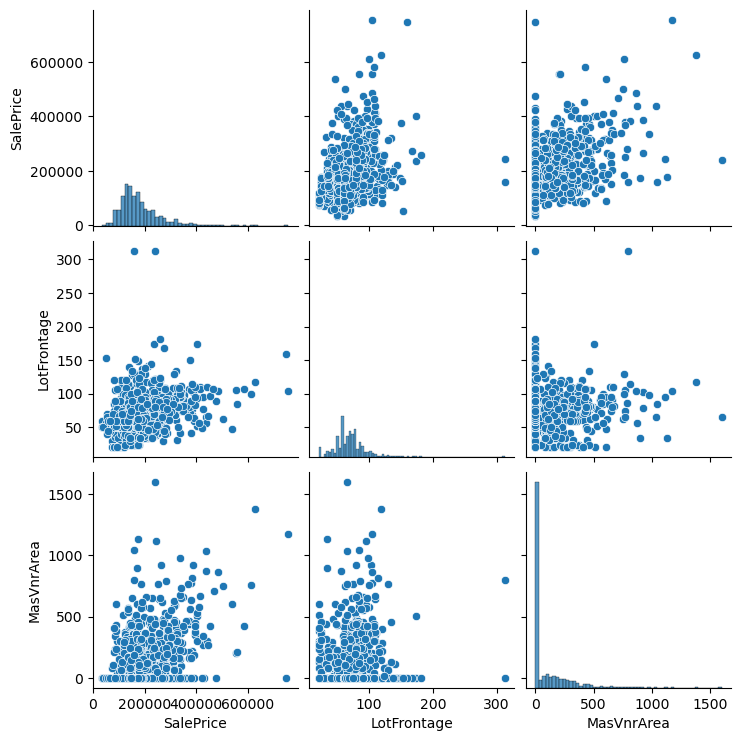

In [16]:
#Let's see how important the 'LotFrontage' and MasVnrArea columns are

sns.pairplot(housing_ds[['SalePrice','LotFrontage','MasVnrArea']])

In [17]:
#Looks like LotFrontage and MasVnrArea fields are linearly dependent on Saleprice so we will not drop LotFrontage instead we will impute NAN values with median
housing_ds.loc[:,'LotFrontage'] = housing_ds.loc[:, 'LotFrontage'].fillna(housing_ds['LotFrontage'].median())
housing_ds['MasVnrArea']= housing_ds['MasVnrArea'].fillna(housing_ds['MasVnrArea'].median())

In [18]:
#check further on missing percentage of other columns
percent_missing = 100*(housing_ds.isnull().mean()).sort_values(ascending = False)
percent_missing.head(20)

Electrical      0.068493
MSSubClass      0.000000
HalfBath        0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
FullBath        0.000000
GarageYrBlt     0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
1stFlrSF        0.000000
GarageType      0.000000
GarageFinish    0.000000
MSZoning        0.000000
dtype: float64

- All the NA Values are Cleaned

- By checking at the data dictionary, and the data type of the variables, for some of the columns data type need to be changed.
For eg: MSSubClass, OverallQual, OverallCond are categorical variables which needs to be converted

In [19]:
housing_ds[['MSSubClass','OverallQual','OverallCond']] =\
  housing_ds[['MSSubClass','OverallQual','OverallCond']].astype('object')

In [20]:
cat_housing_ds = housing_ds.select_dtypes(include='object')
cat_housing_ds.shape

(1460, 40)

In [21]:
num_housing_ds = housing_ds.select_dtypes(include=['int64', 'float64'])
num_housing_ds.shape

(1460, 34)

#### Checking how Target Variable is distributed 

In [22]:
#In this  case, the dependent variable i.e SalePrice

#descriptive statistics summary
housing_ds['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- As per stats data, it looks the values are skewed. Confirming the same with distplot

<Axes: xlabel='SalePrice', ylabel='Density'>

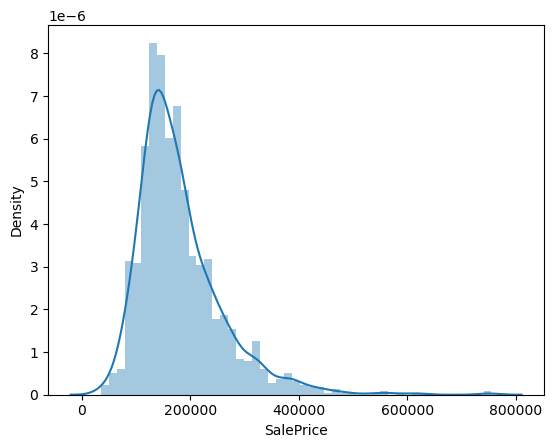

In [23]:
sns.distplot(housing_ds['SalePrice'])

 The target variable `SalePrice` is not normally distributed and its skewed towards rightside, as per the distribution.

In [24]:
housing_ds['SalePrice'].skew()

1.8828757597682129

The skewness is greater than 1, so the target variable is highly skewed.

In [25]:
## Check the kurtosis of target variable
housing_ds['SalePrice'].kurt()

6.536281860064529

The kurtosis is greater than 1, so the distribution of target variable is highly peaked.<br>
So, we will log transform our target variable

In [26]:
## Log transform the target variable
housing_ds['SalePrice'] = np.log(housing_ds['SalePrice'])

In [27]:
## Check the skewness of target variable again
housing_ds['SalePrice'].skew()

0.12133506220520406

In [28]:
## Check the kurtosis of target variable again
housing_ds['SalePrice'].kurt()

0.8095319958036296

Both skewness and kurtosis are less than 1 now.

<Axes: xlabel='SalePrice', ylabel='Density'>

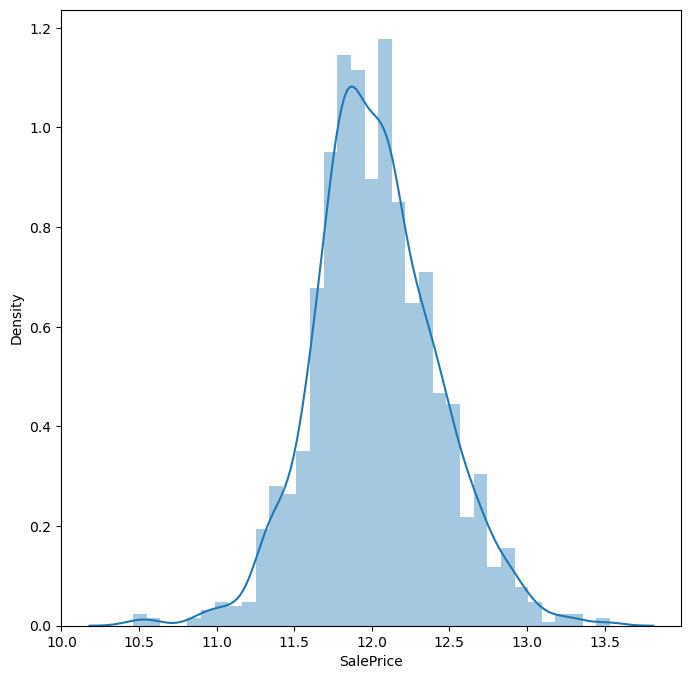

In [29]:
## Plot the spread of transformed target variable
plt.figure(figsize=[8,8])
sns.distplot(housing_ds['SalePrice'])

So, our target variable has normal distribution now.

#### Univariate analysis on Categorical columns
As there are multiple columns, analysing the categorical columns in different groups.

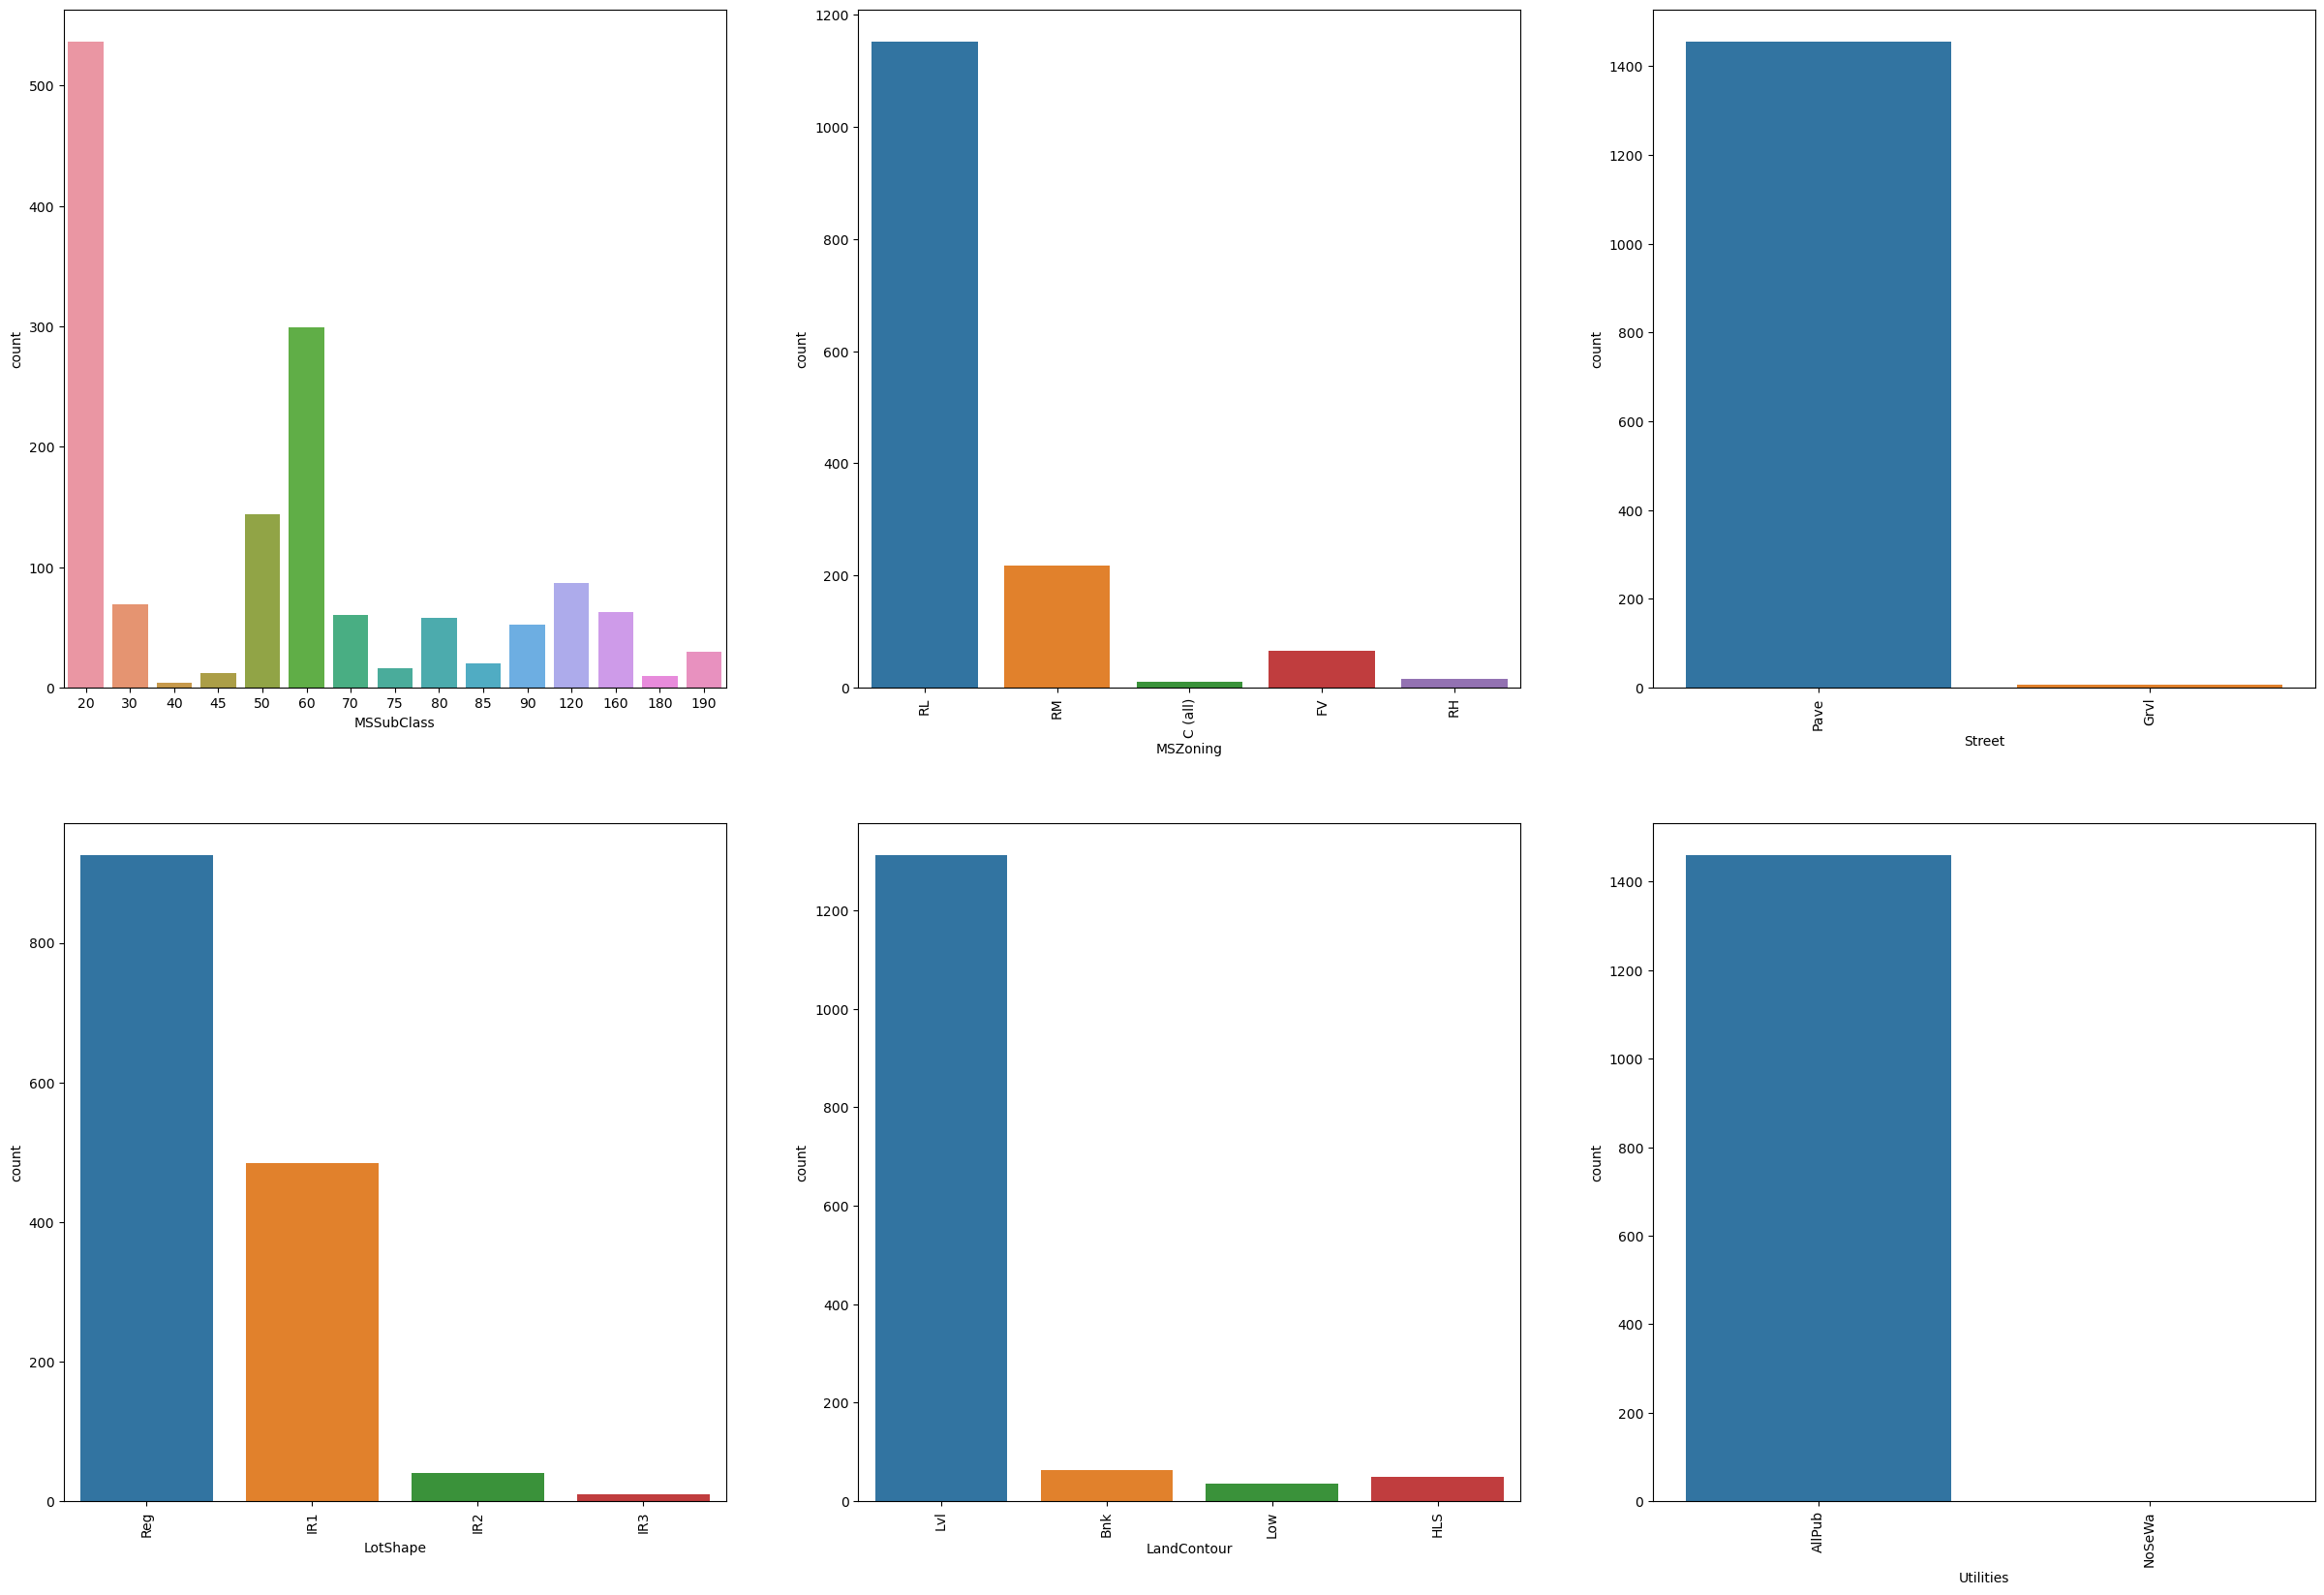

In [30]:
#Categorical data, group1
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='MSSubClass',data = housing_ds)
plt.subplot(2,3,2)
sns.countplot(x = 'MSZoning', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'Street', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'LotShape', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'LandContour', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'Utilities',data = housing_ds)
plt.xticks(rotation=90)
plt.show()

- From above group `Utilities`, `Street`, `LanContour` columns are not equally distributed, and we can see that majority of the values are of single type so we are dropping these columns

In [31]:
#Check for count of unique count of 'Utilities' column
housing_ds.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [32]:
#Check for count of unique count of 'Street' column
housing_ds.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [33]:
#Check for count of unique count of 'Street' column
housing_ds.LandContour.value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [34]:
# Replacing all other columns except 1st 3 columns with Value makring as  'Others' category
housing_ds['LandContour'] = housing_ds['LandContour'].replace(['HLS','Bnk','Low'],'Others')

In [35]:
#Check for count of unique count of 'Street' column
housing_ds.LandContour.value_counts()

LandContour
Lvl       1311
Others     149
Name: count, dtype: int64

In [36]:
#Check for count of unique count of 'LandContour' column
housing_ds.LandContour.value_counts()

LandContour
Lvl       1311
Others     149
Name: count, dtype: int64

In [37]:
#Droppping 'Utilities', 'Street' columns
housing_ds.drop(['Utilities','Street','LandContour'],axis=1,inplace=True)

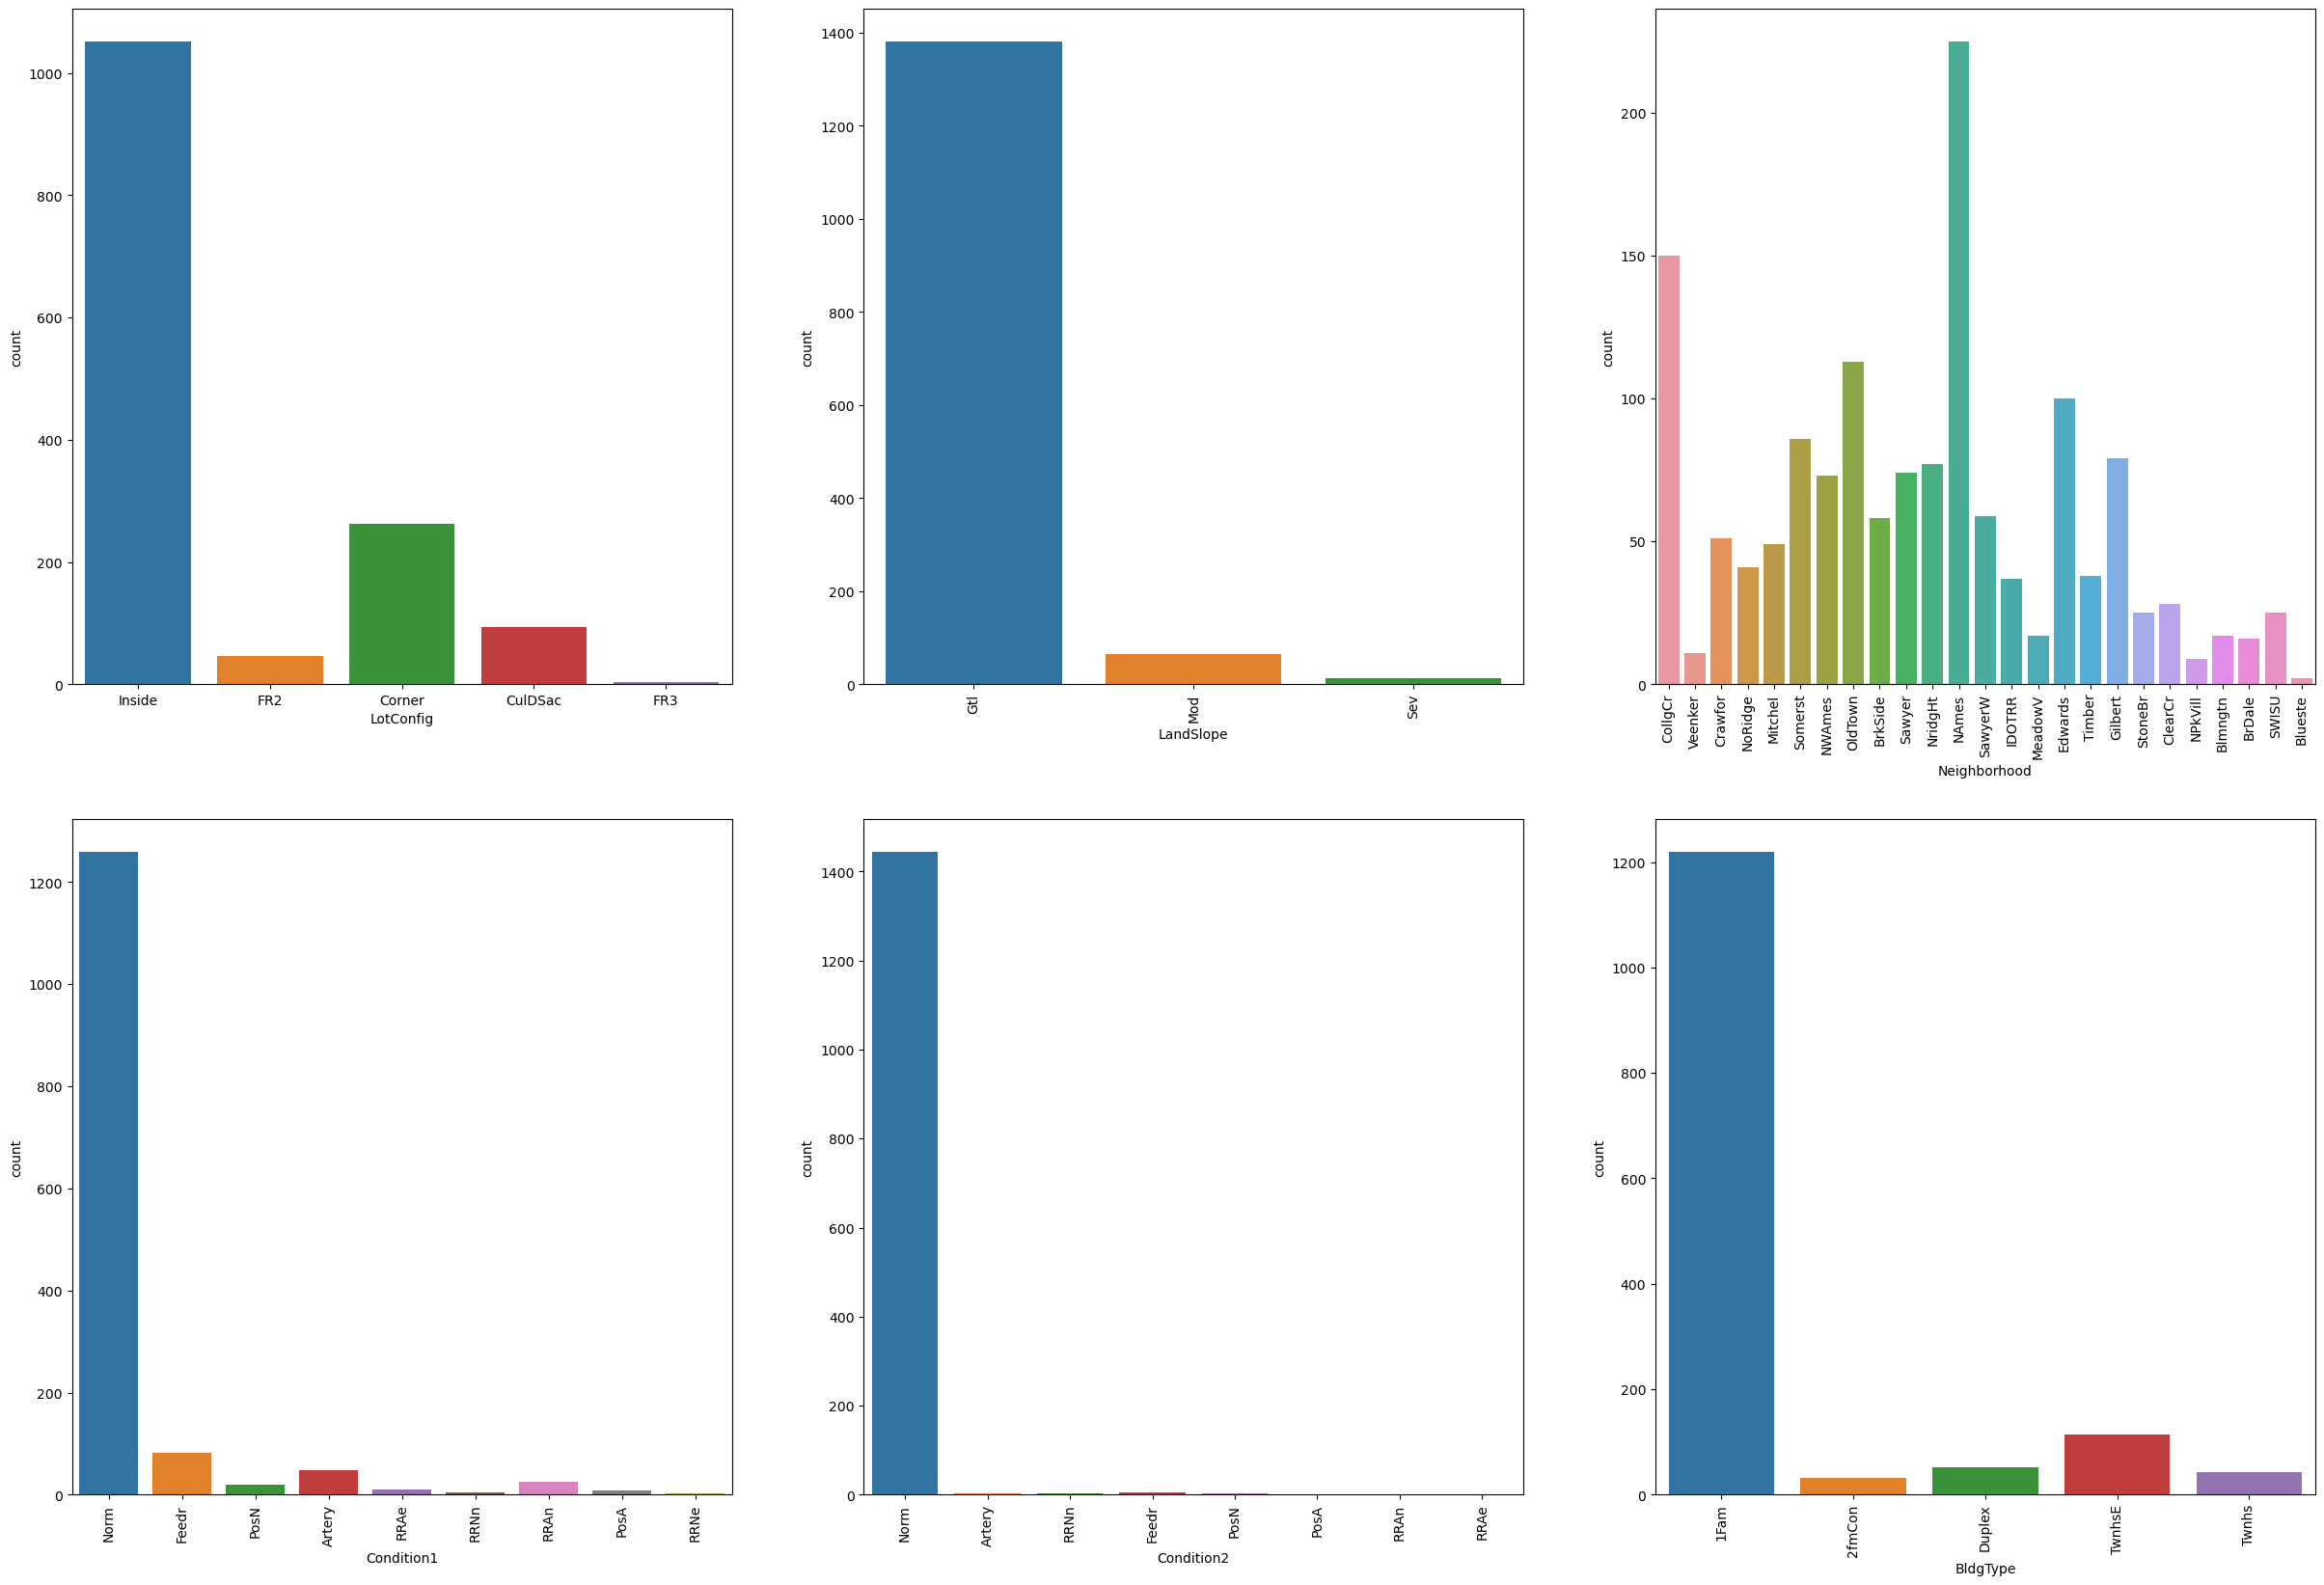

In [38]:
#Categorical data, group2
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='LotConfig', data = housing_ds)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood',  data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing_ds)
plt.xticks(rotation=90)
plt.show()


- `Condition1`, `Condition2` (Proximity to various conditions) parameters looks to be highly skewed, and majority of the values are of Normal category. Rechecking the count for the same.

In [39]:
#Check for count of unique count of 'Condition1' column
housing_ds['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [40]:
#Check for count of unique count of 'Condition2' column
housing_ds['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

As majority of the values are of same type (Normal), dropping these(`Condition1`, `Condition2`) columns.

In [41]:
#Droppint 'Condition1','Condition2' column
housing_ds.drop(['Condition1','Condition2'],axis=1,inplace=True)

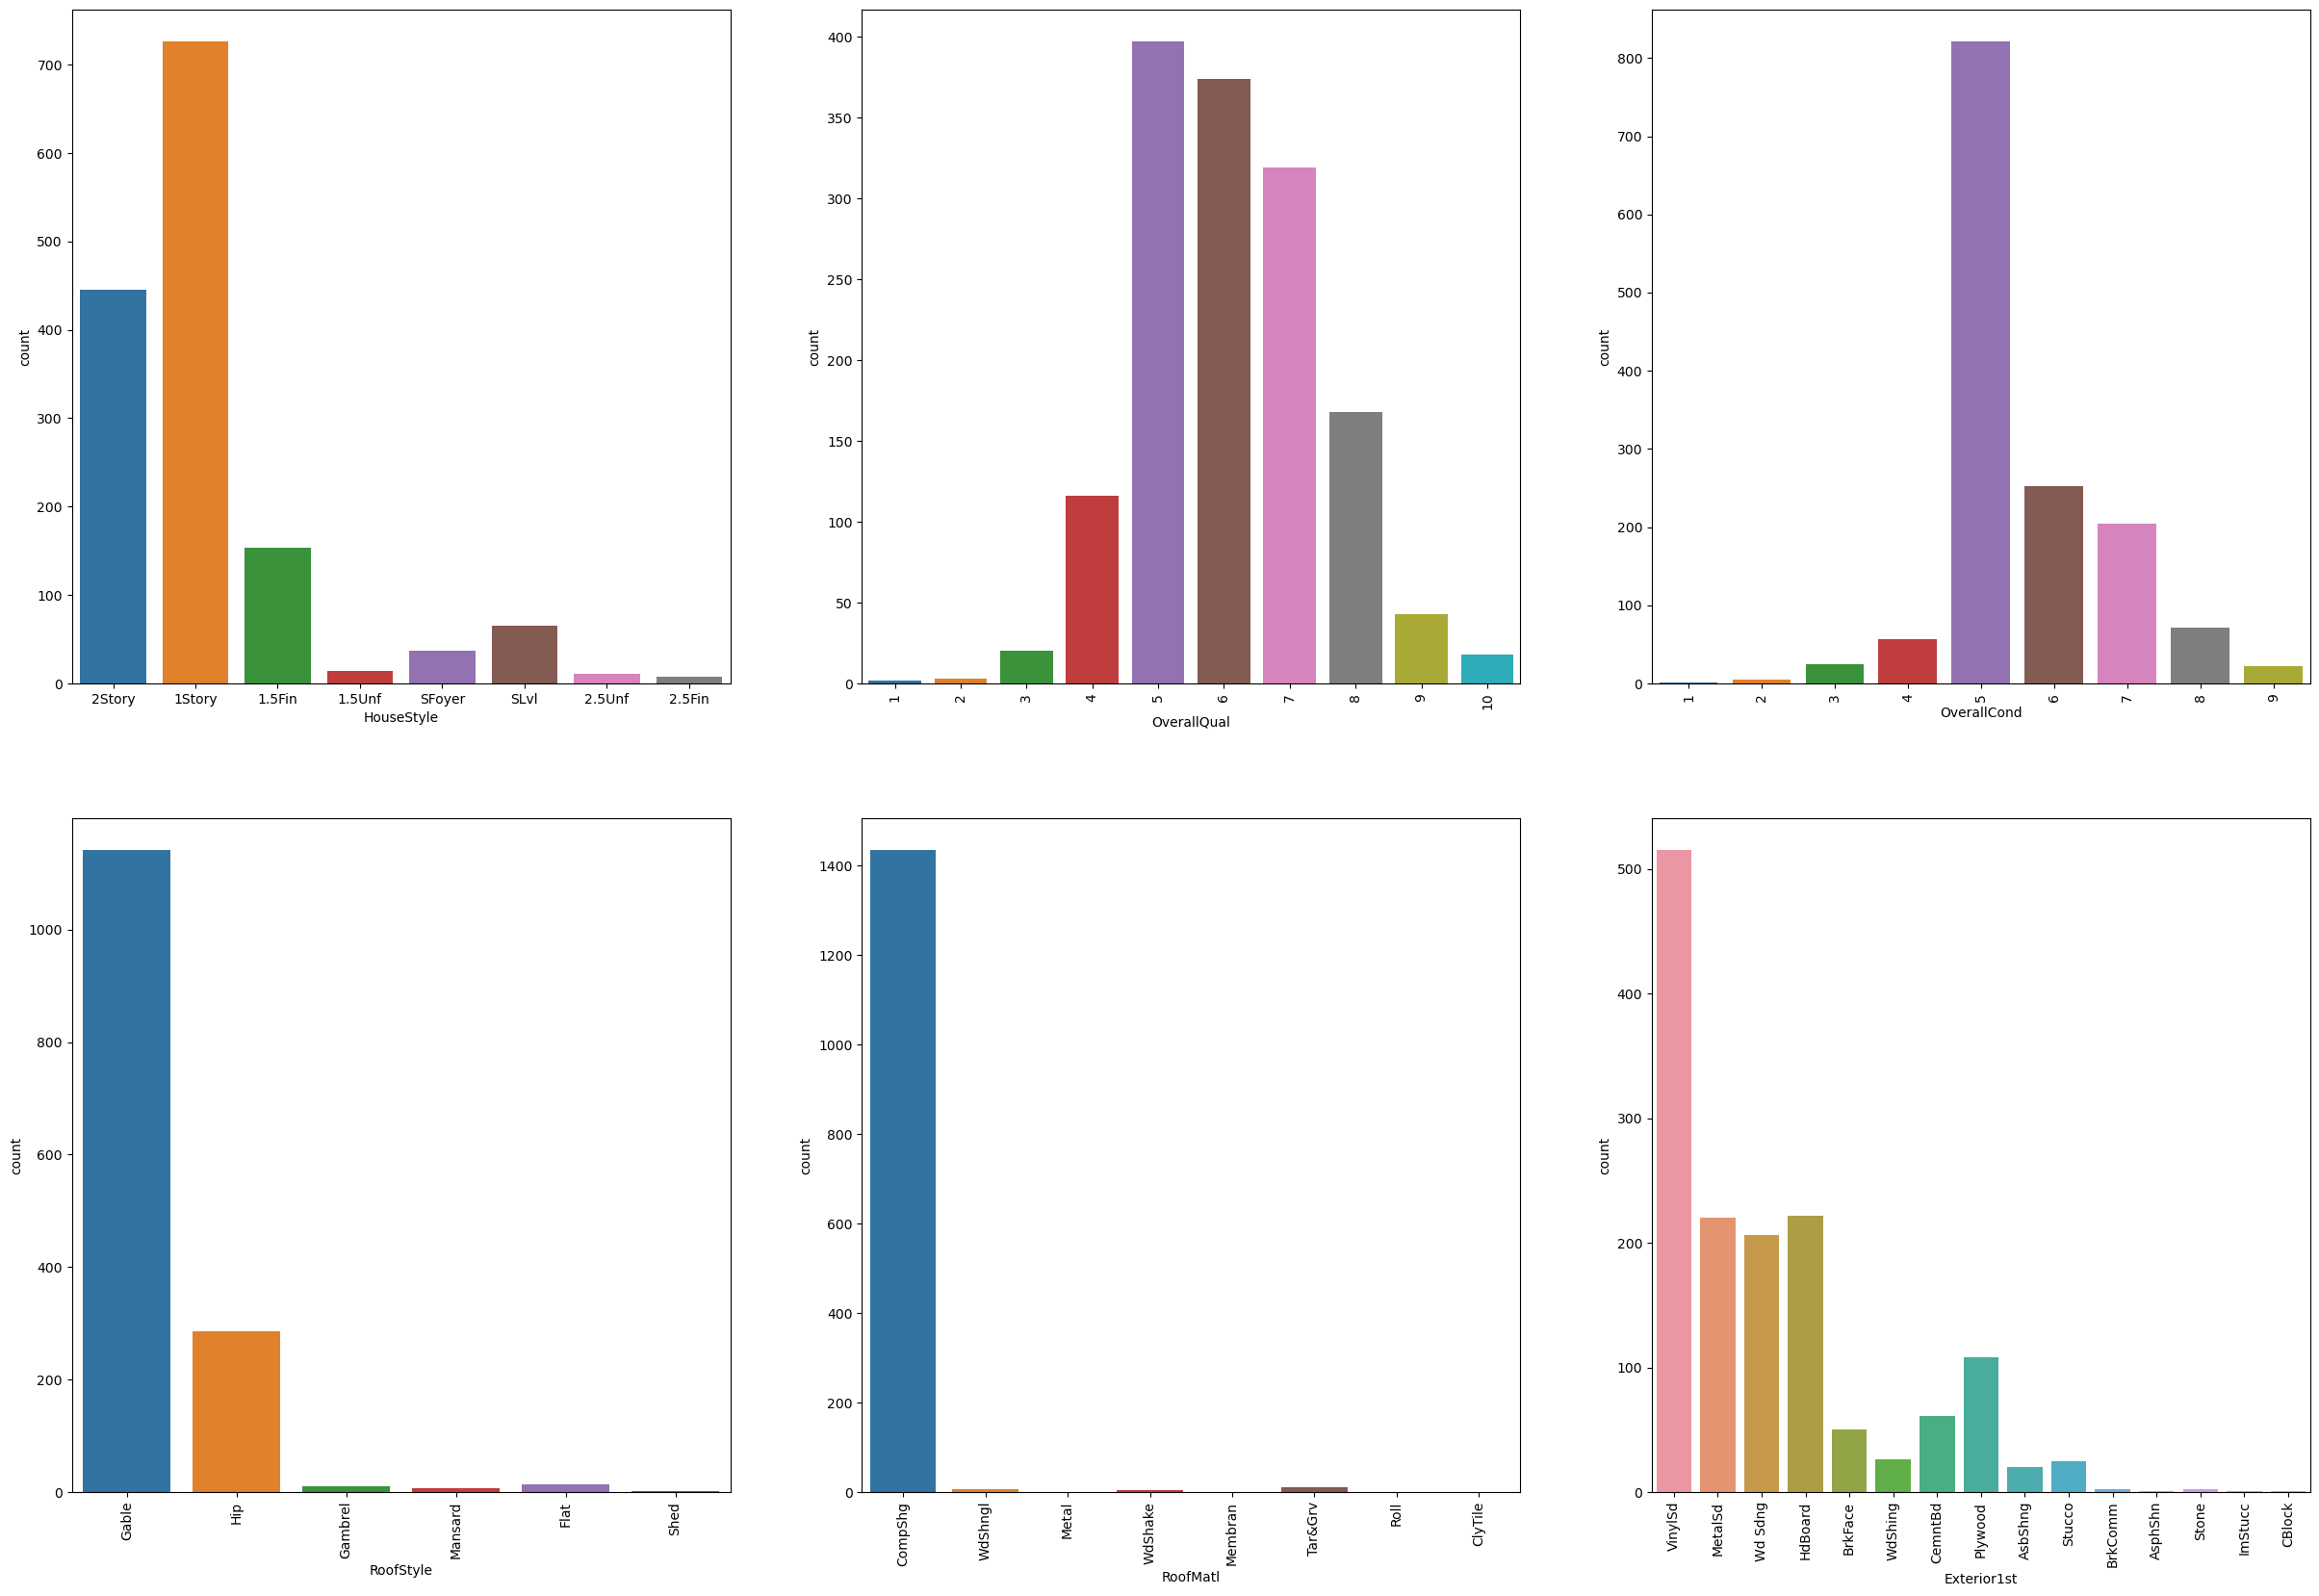

In [42]:
#Categorical data, group3
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='HouseStyle', data = housing_ds)
plt.subplot(2,3,2)
sns.countplot(x = 'OverallQual', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'OverallCond',  data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'RoofStyle', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'RoofMatl',data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'Exterior1st', data = housing_ds)
plt.xticks(rotation=90)
plt.show()

- From the above countplot it looks `RoofMatl` looks to be skewed. Taking a count of values to confirm.

In [43]:
#Check for count of unique count of 'RoofMatl' column
housing_ds['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [44]:
#Dropping 'RoofMatl' column
housing_ds.drop(['RoofMatl'],axis=1,inplace=True)

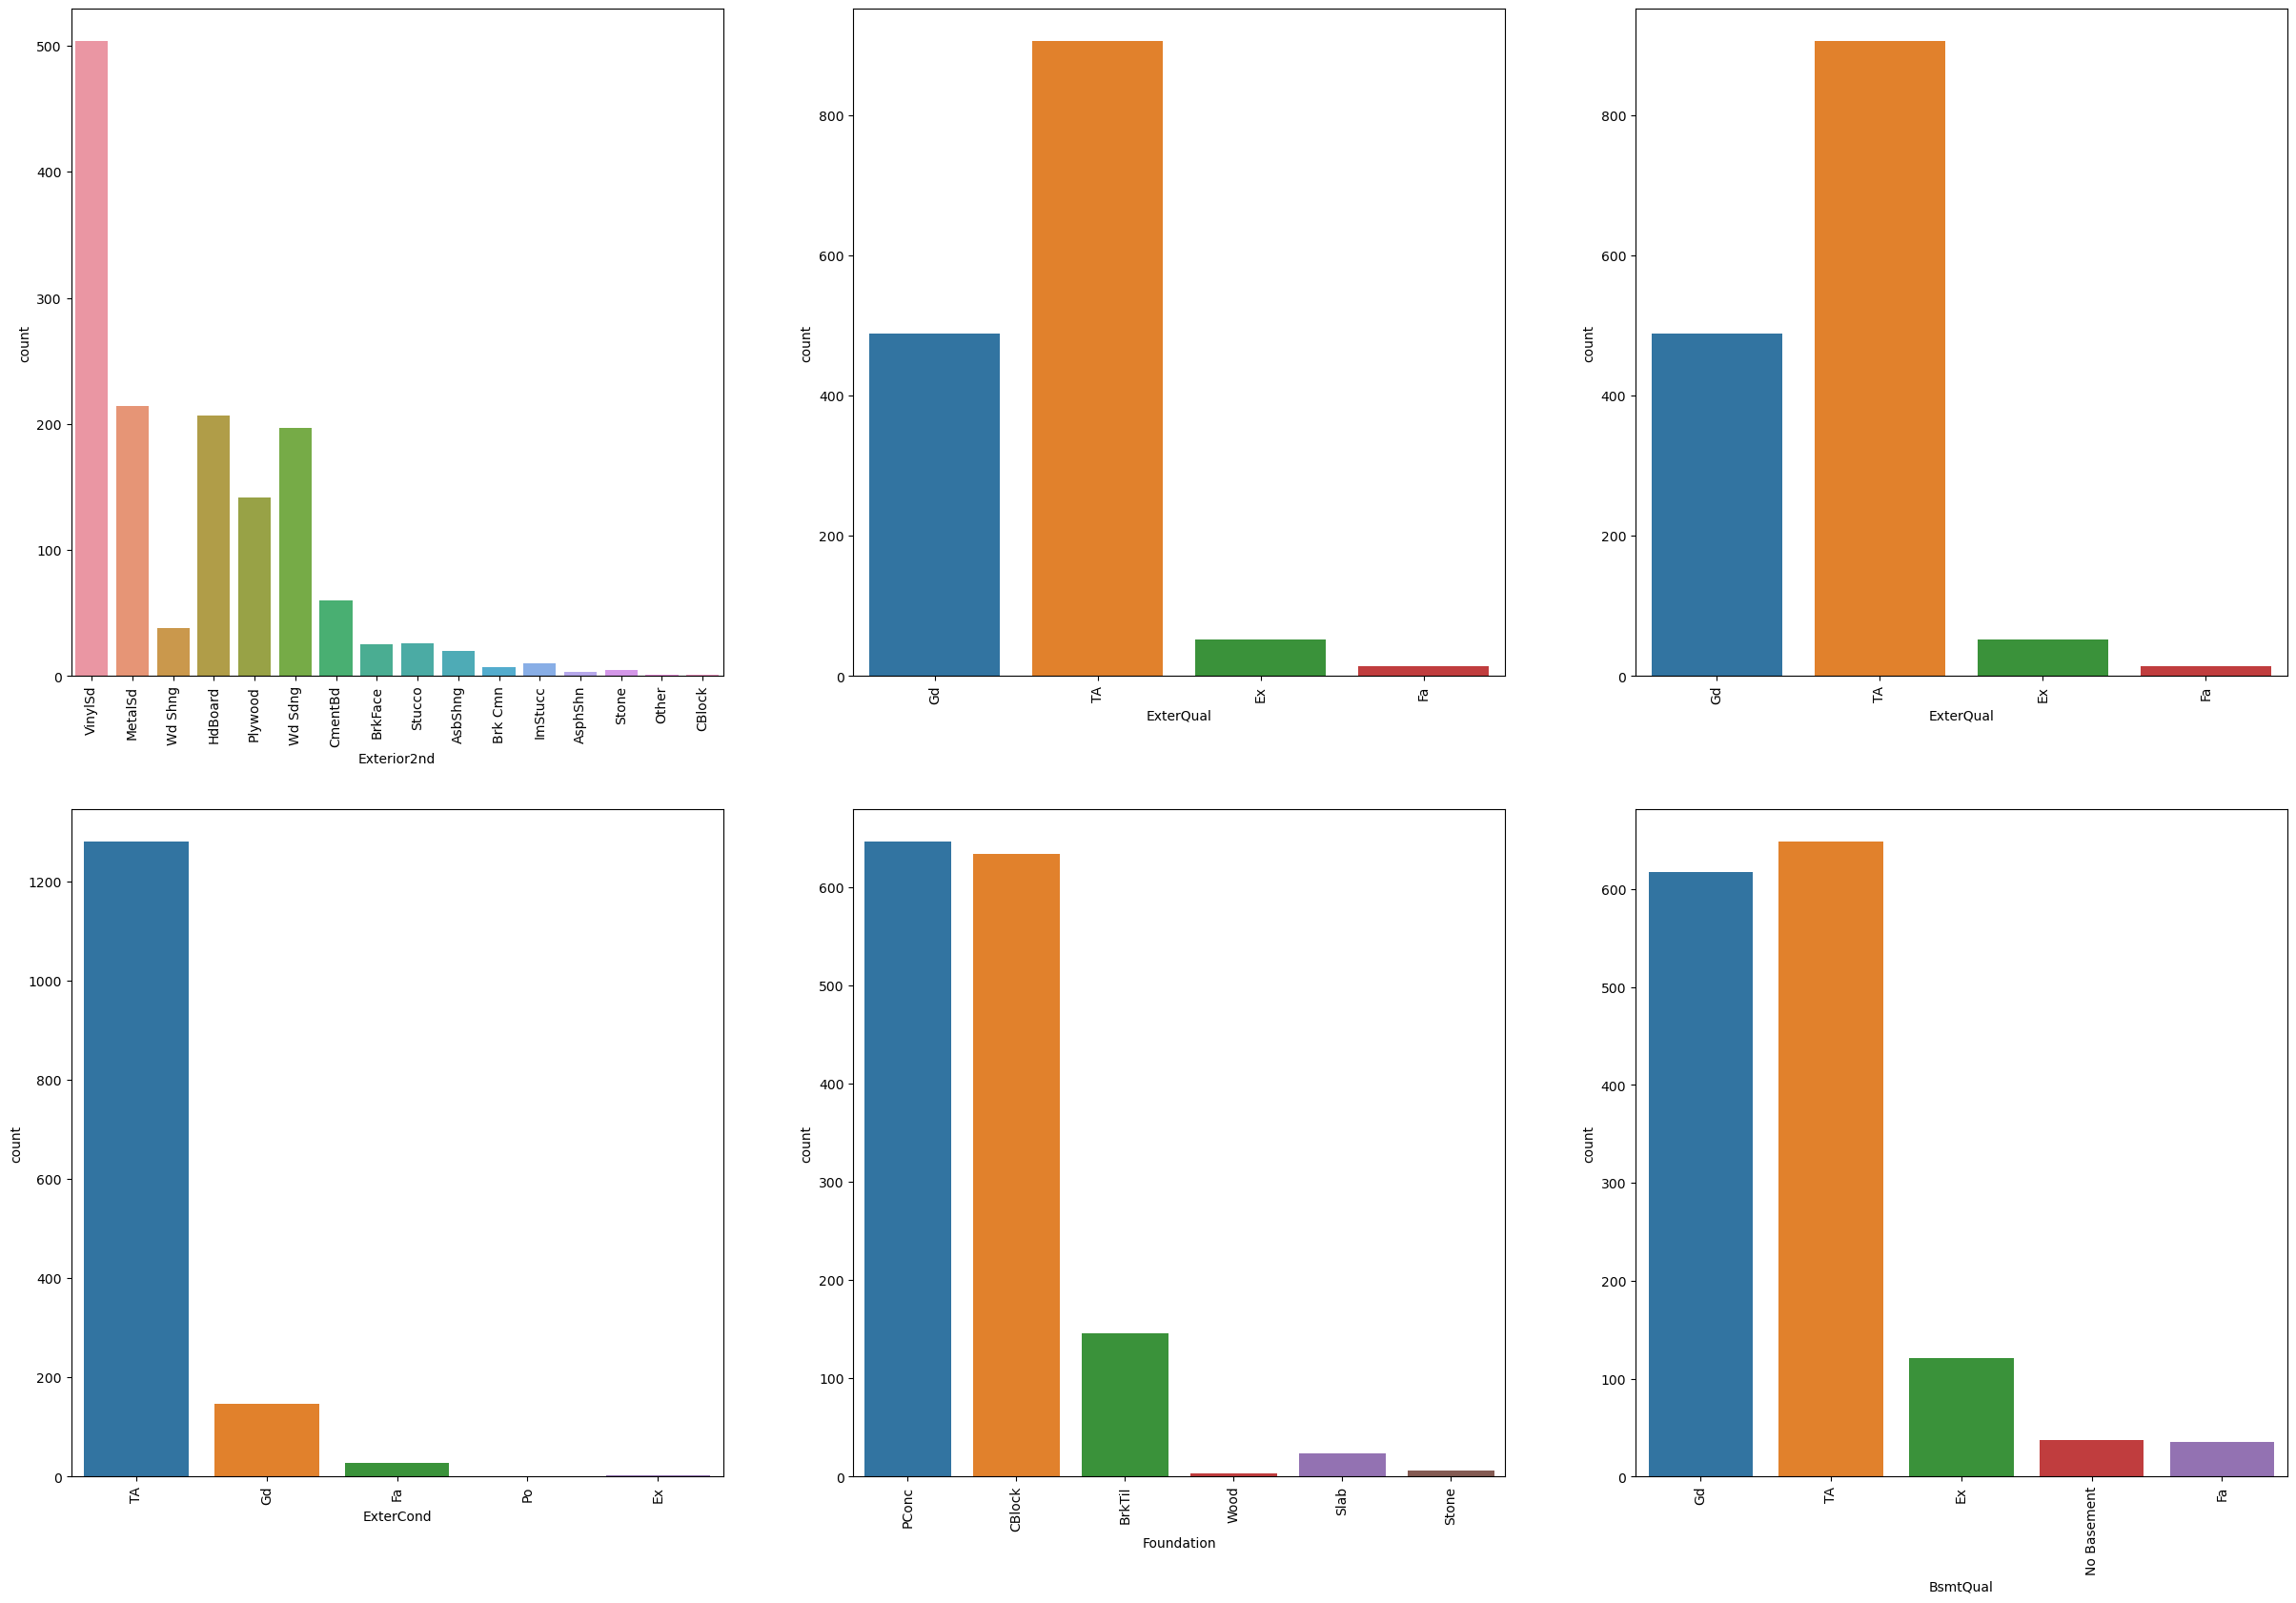

In [45]:
#Categorical data, group3
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='Exterior2nd', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,2)
sns.countplot(x = 'ExterQual', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'ExterQual',  data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'ExterCond', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'Foundation',data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'BsmtQual', data = housing_ds)
plt.xticks(rotation=90)
plt.show()

- From the above countplot it looks `ExterCond` looks to be skewed. Taking a count of values to confirm.

the categories of `ExterCond` column looks to be skewed. 

In [46]:
#Check for unique counts of 'ExterCond' column
housing_ds['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [47]:
# Replacing all other columns except 1st 3 columns with Value makring as  'Others' category
housing_ds['ExterCond'] = housing_ds['ExterCond'].replace(['Fa','Ex','Po'],'Others')

In [48]:
#Check for unique counts of 'ExterCond' column
housing_ds['ExterCond'].value_counts()

ExterCond
TA        1282
Gd         146
Others      32
Name: count, dtype: int64

In [49]:
# Dropping 'ExterCond' column
housing_ds.drop(['ExterCond'],axis=1,inplace=True)

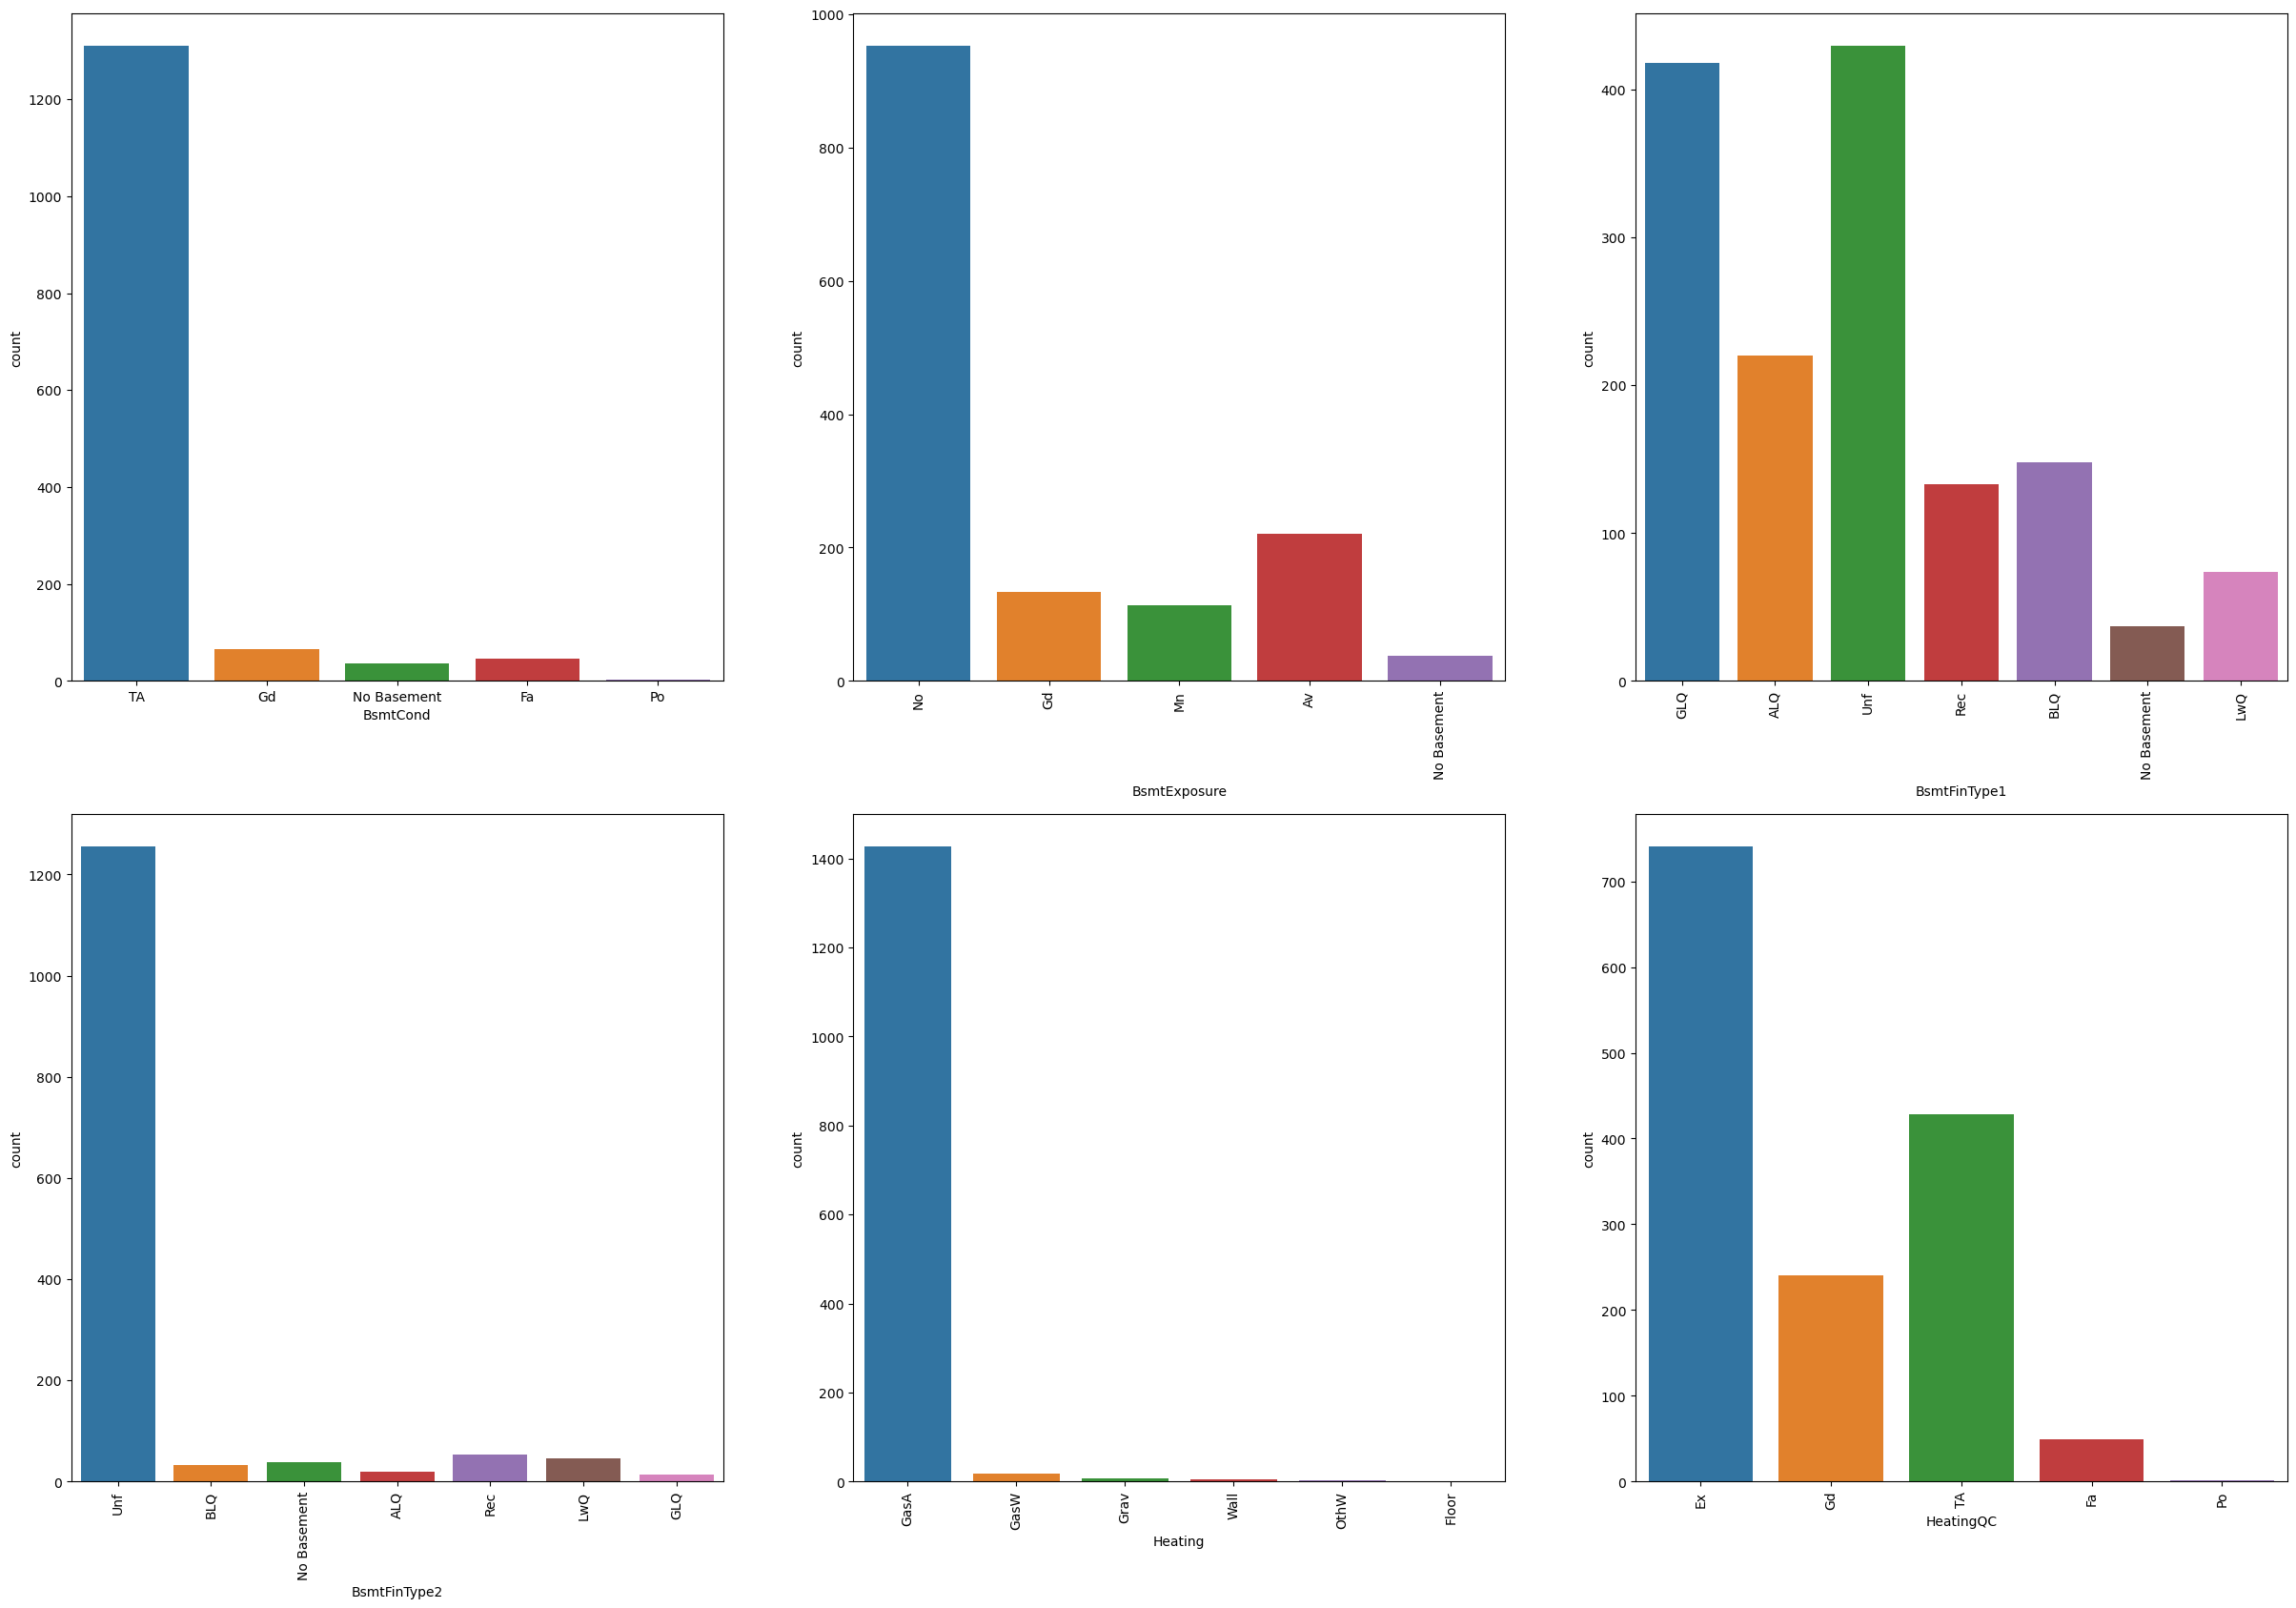

In [50]:
#Categorical data, group4
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='BsmtCond', data = housing_ds)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtExposure', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1',  data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType2', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'Heating',data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'HeatingQC', data = housing_ds)
plt.xticks(rotation=90)
plt.show()

- From the above countplot it looks `Heating` looks to be skewed. Taking a count of values to confirm.

In [51]:
#Check for unique counts of 'Heating' column
housing_ds['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [52]:
# Drop 'Heating' Parameter
housing_ds.drop(['Heating'],axis=1,inplace=True)

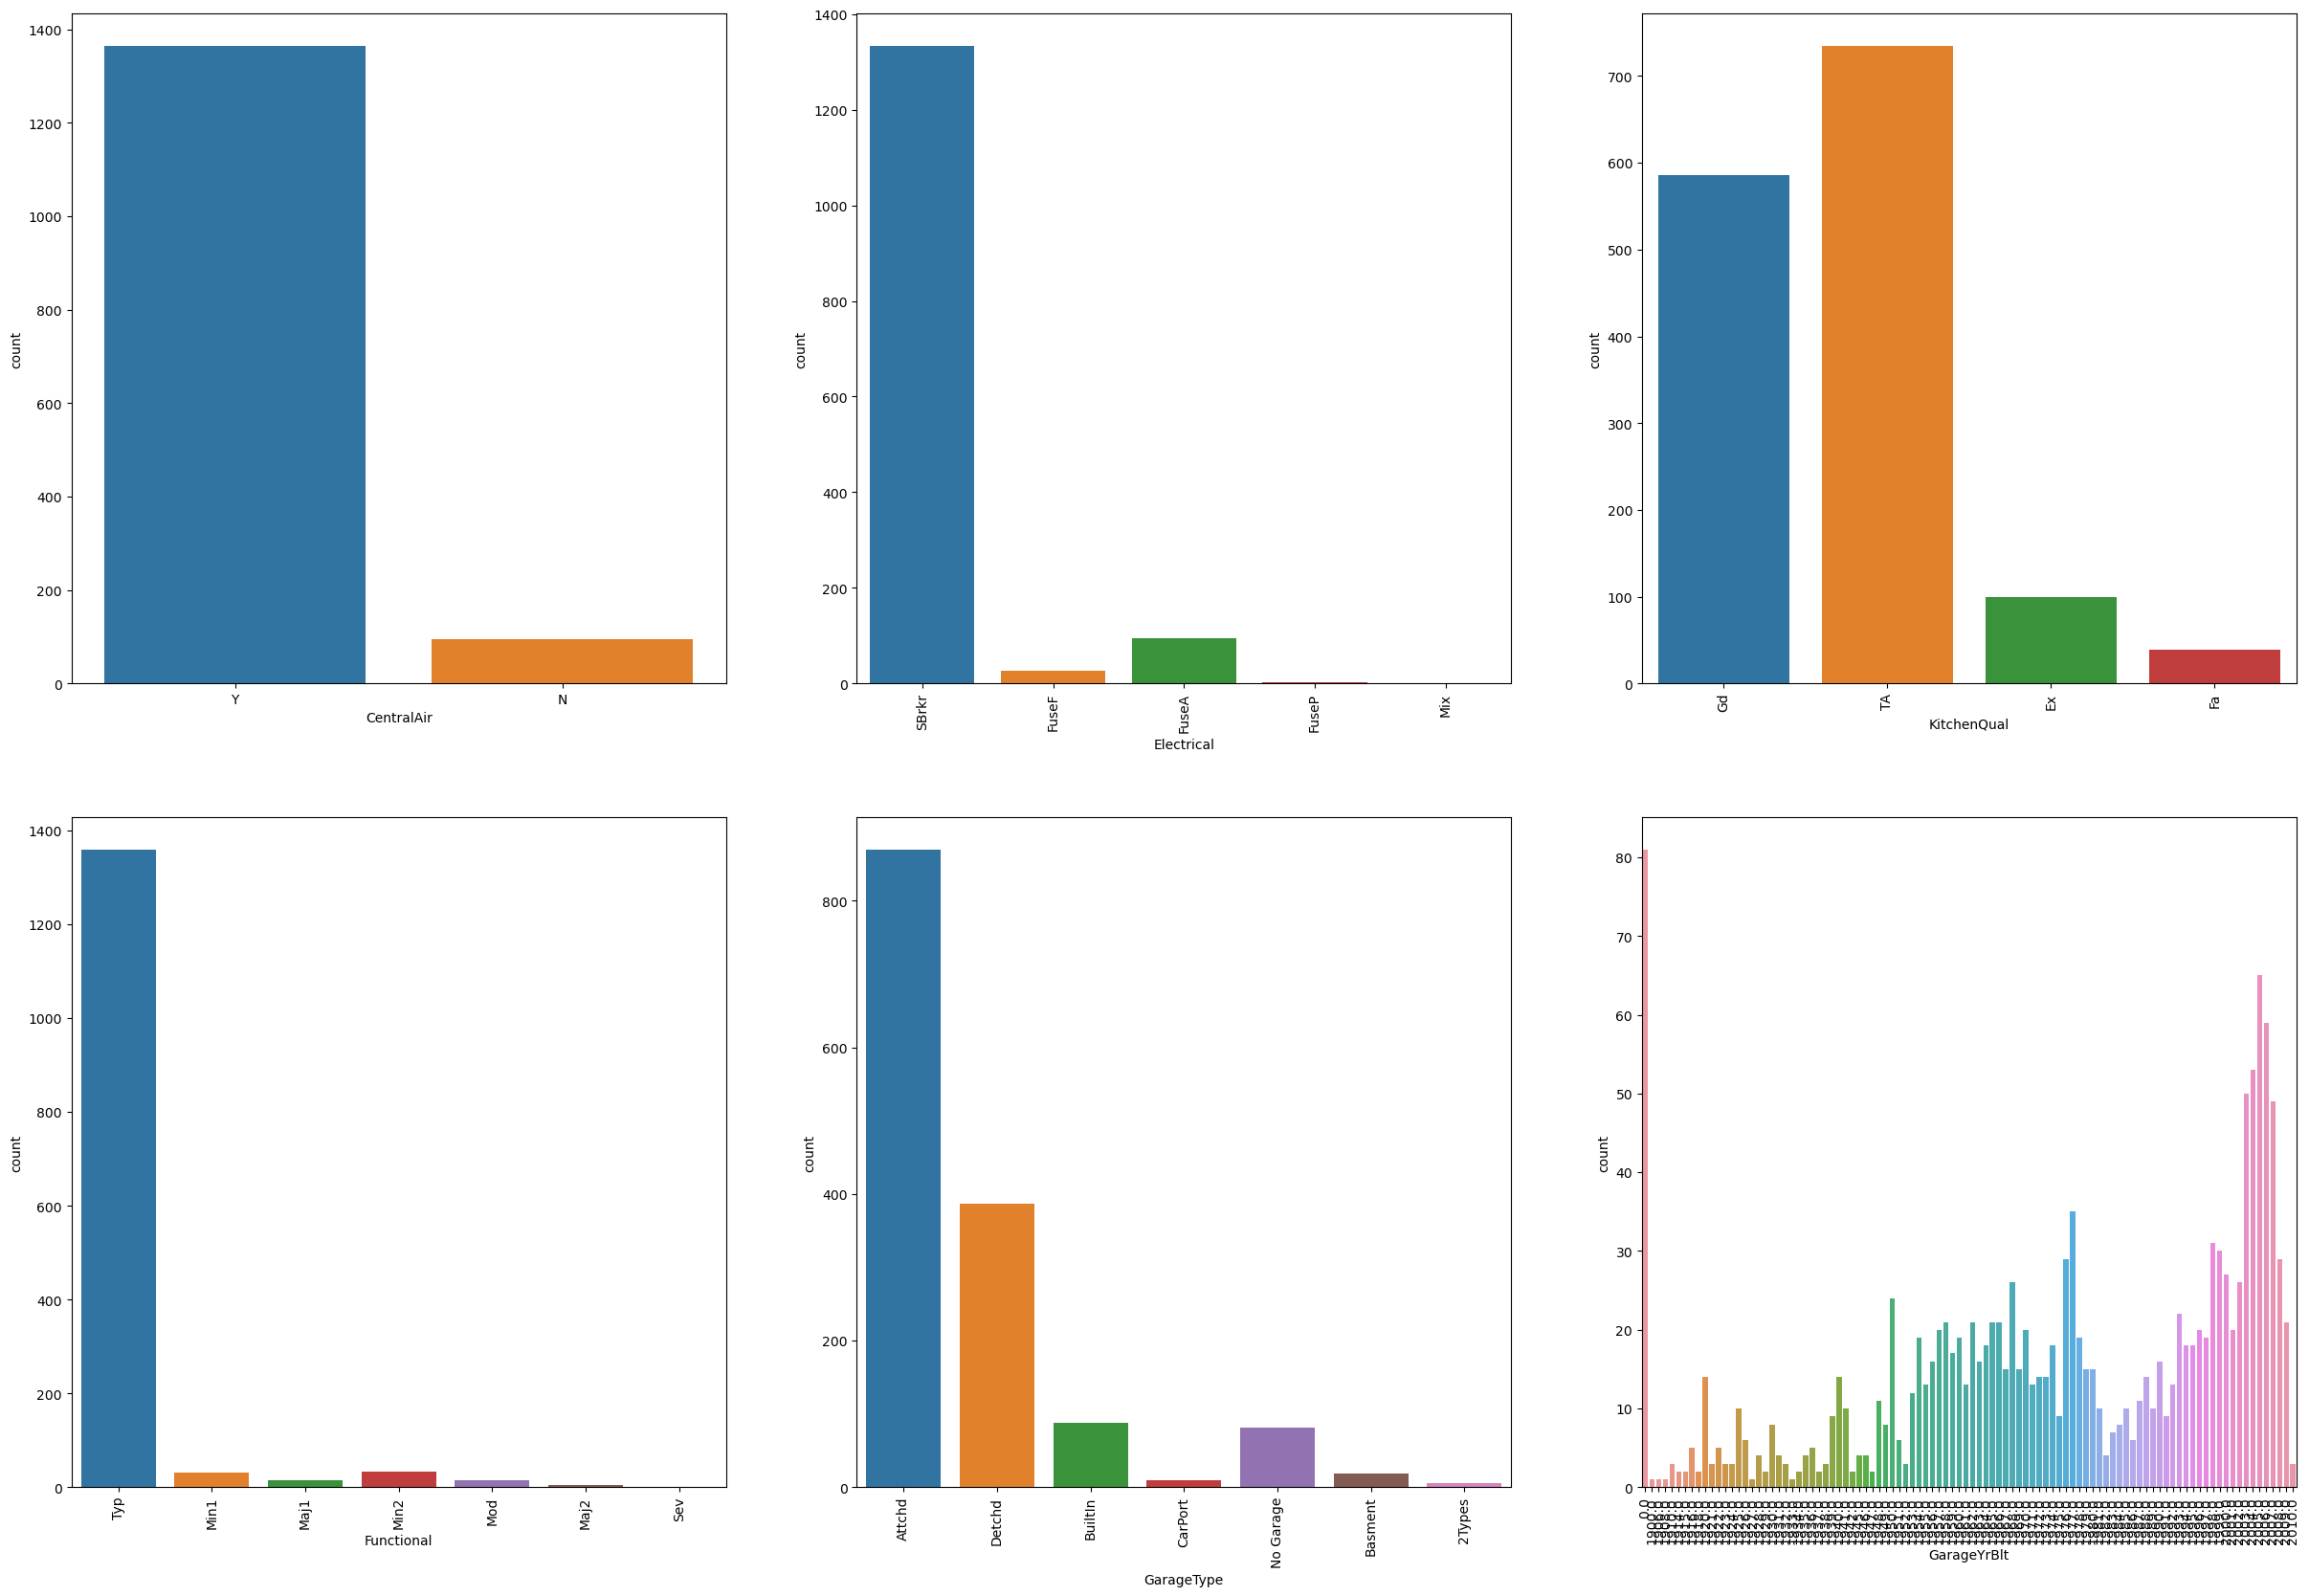

In [53]:
#Categorical data, group5
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='CentralAir', data = housing_ds)
plt.subplot(2,3,2)
sns.countplot(x = 'Electrical', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'KitchenQual',  data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'Functional', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'GarageType',data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'GarageYrBlt', data = housing_ds)
plt.xticks(rotation=90)
plt.show()

- From the above  countplot, `CentralAir`, `Functional`, `Electrical` columns looks to be skewed

In [54]:
#Check for unique counts of 'CentralAir' column
housing_ds['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [55]:
#Check for unique counts of 'Functional' column
housing_ds['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [56]:
#Check for unique counts of 'Electrical' column
housing_ds['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [57]:
# Dropping 'CentralAir'
housing_ds.drop(['CentralAir','Functional','Electrical'],axis=1,inplace=True)

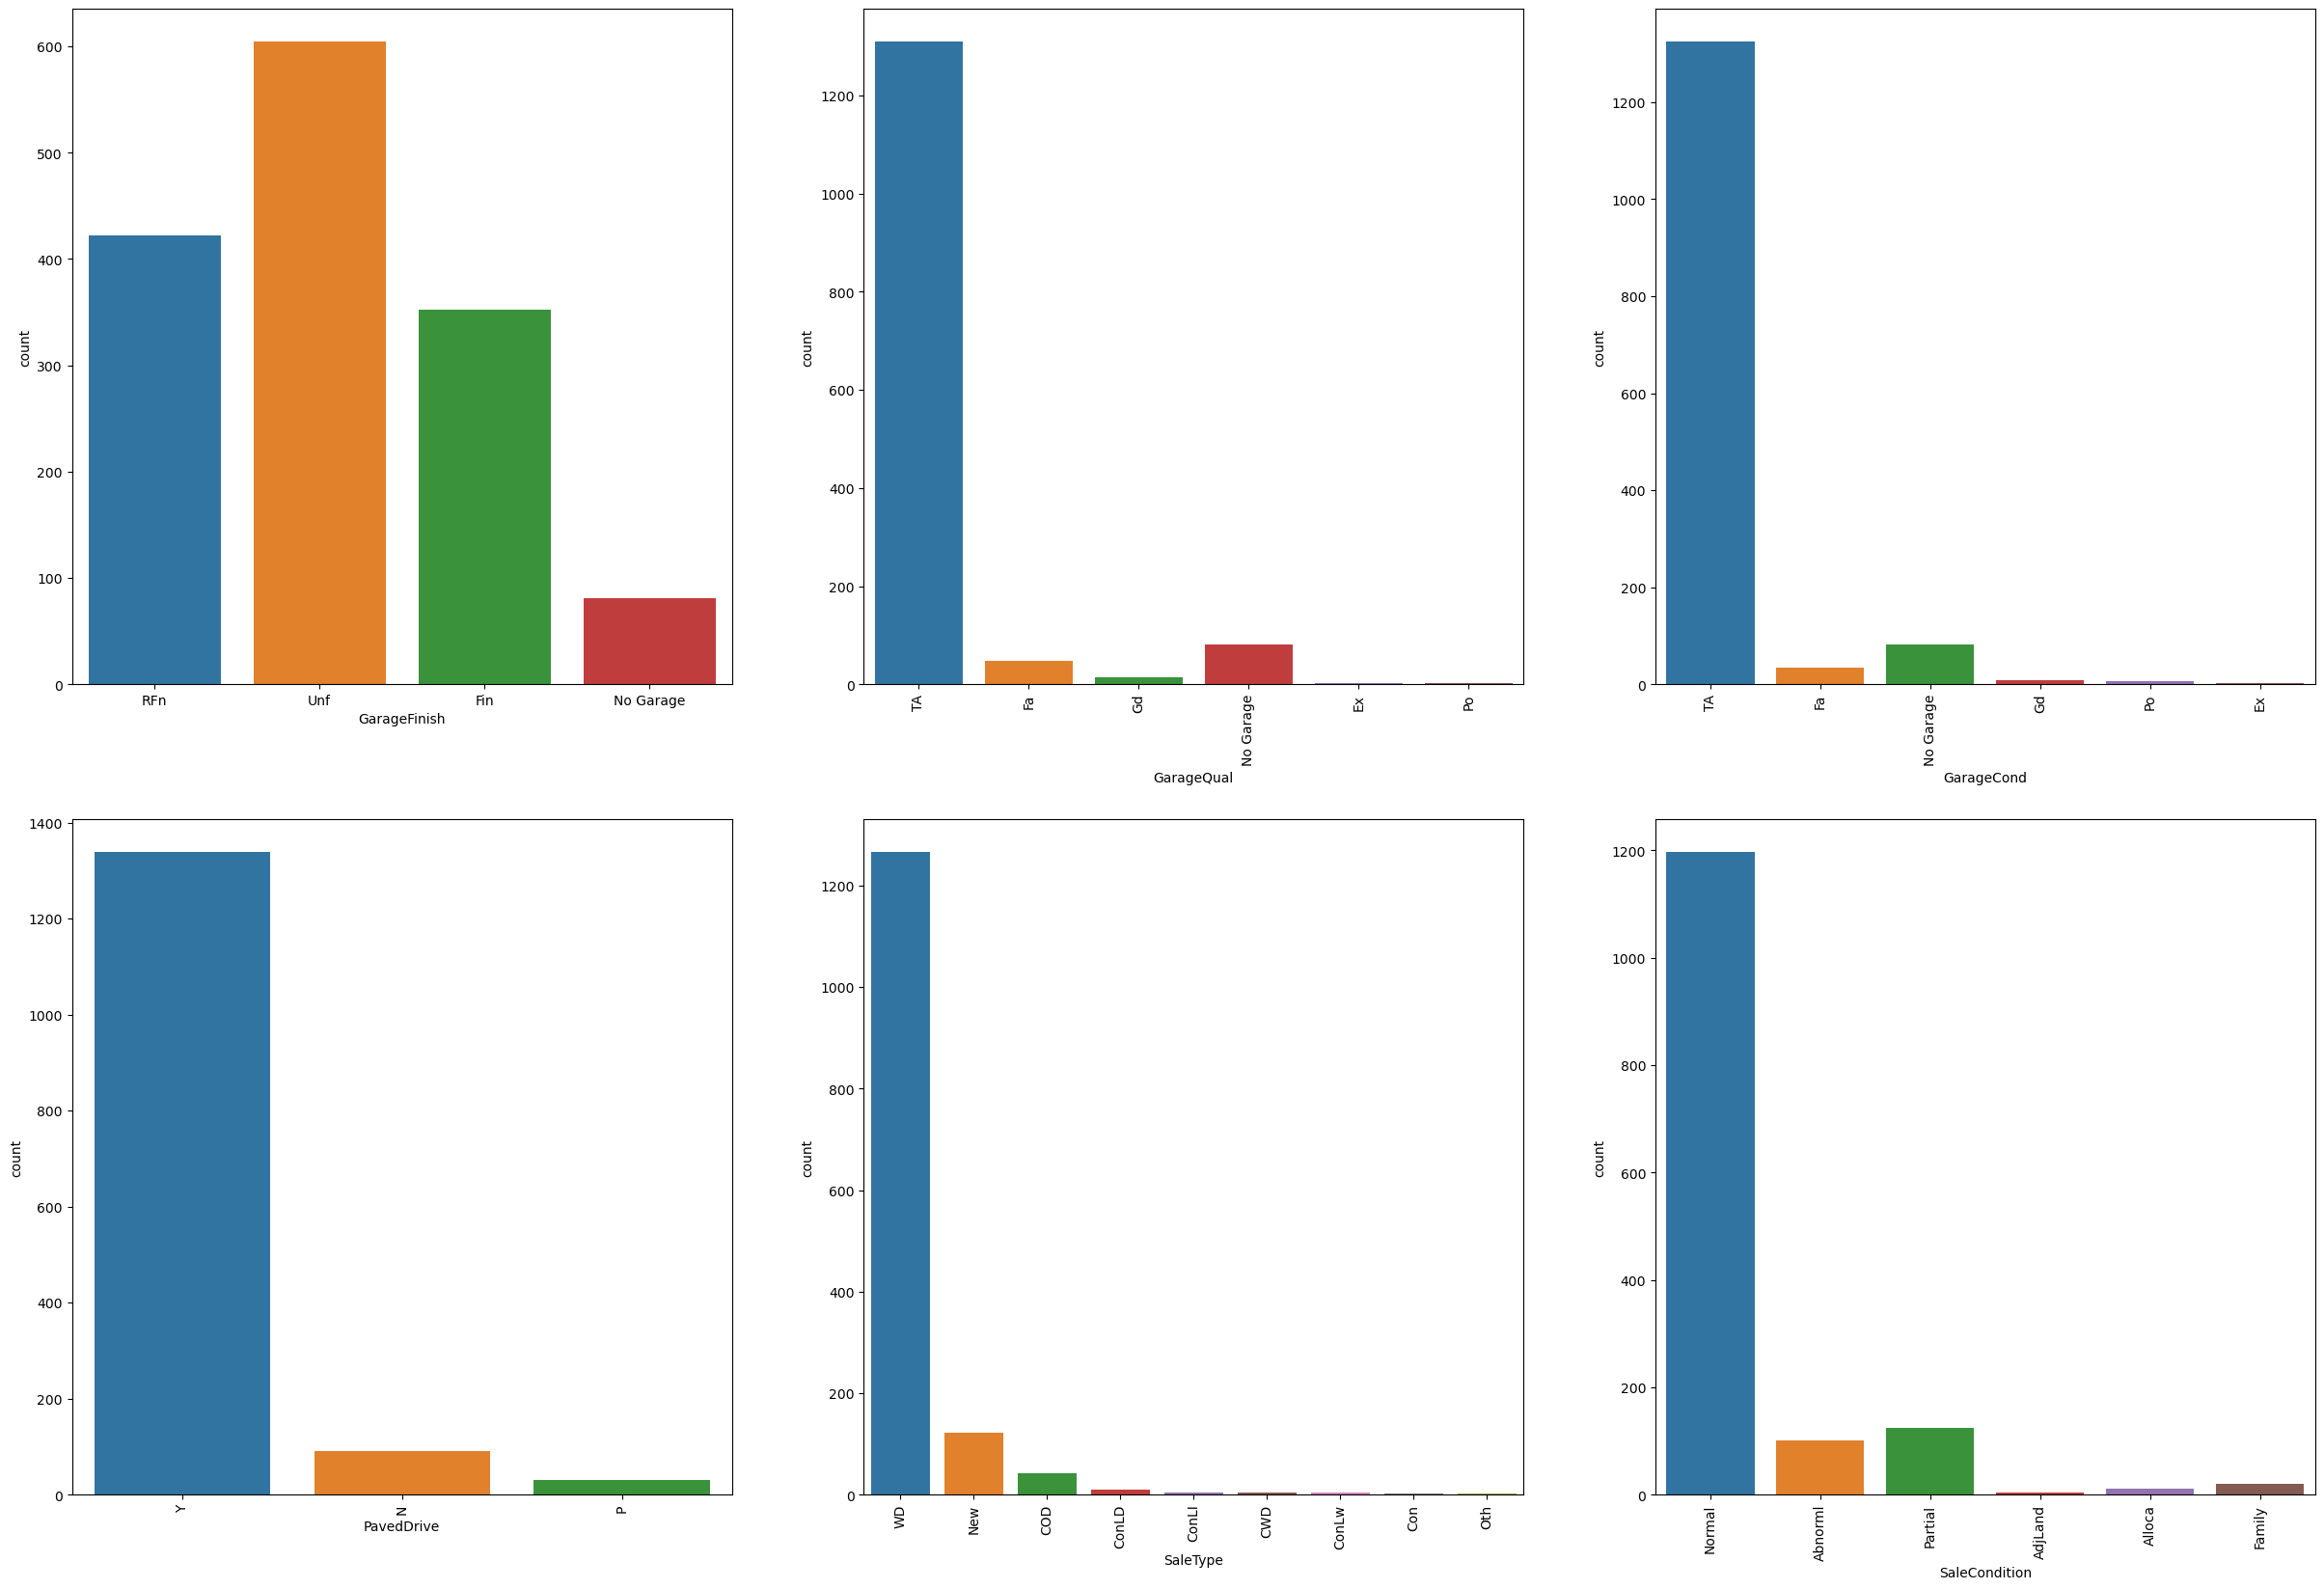

In [58]:
#Categorical data, group6
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='GarageFinish', data = housing_ds)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageQual', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageCond',  data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'PavedDrive', data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',data = housing_ds)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = housing_ds)
plt.xticks(rotation=90)
plt.show()

- For Some of the columns like `SaleCondition`, there are some of the categories with very minimal number of occurances / skewed values.
For `GarageCondition`, `GarageQual`, `SaleType`, `PavedDrive` except one column, all others are skewed.

In [59]:
#Dropping GarageQual, GarageCond, PavedDrive as these values are skewed.
housing_ds.drop(['GarageQual','GarageCond','PavedDrive','SaleType'],axis=1,inplace=True)

In [60]:
#Check  unique counts of 'SaleCondition' column
housing_ds['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [61]:
# Replacing all other columns except 1st 3 columns with Value makring as  'Others' category
housing_ds['SaleCondition'] = housing_ds['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

#### Univariate analysis on Numerical columns 

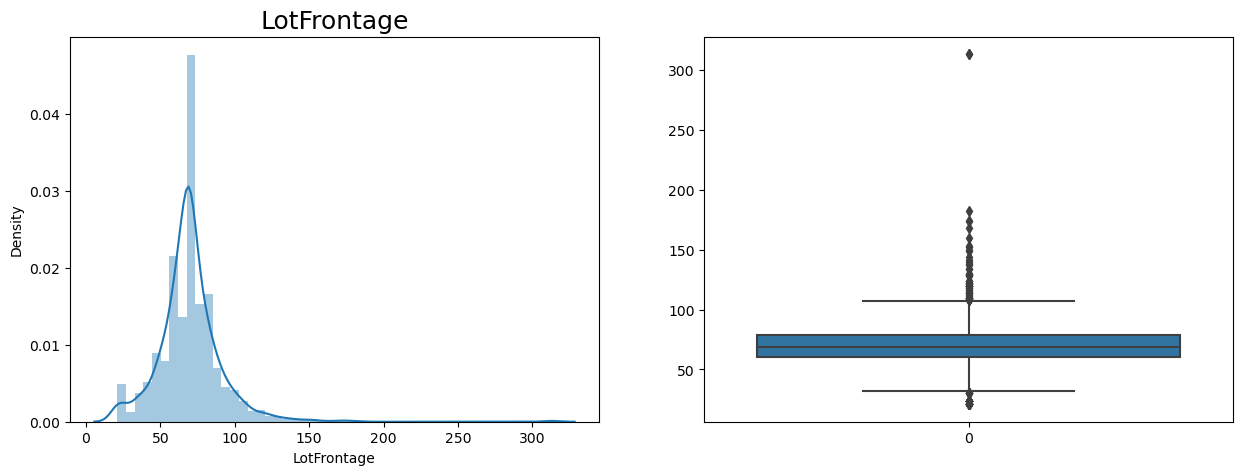

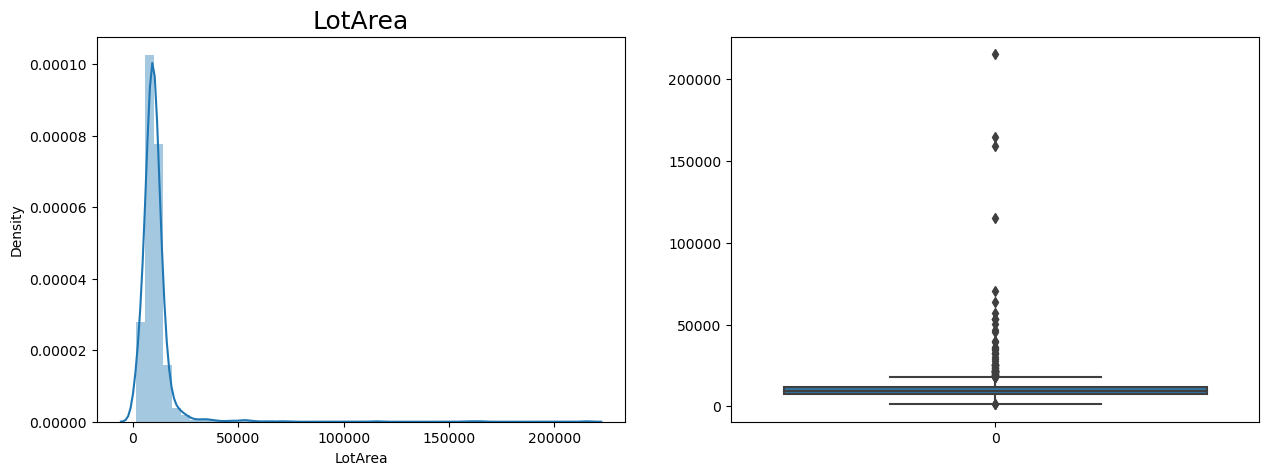

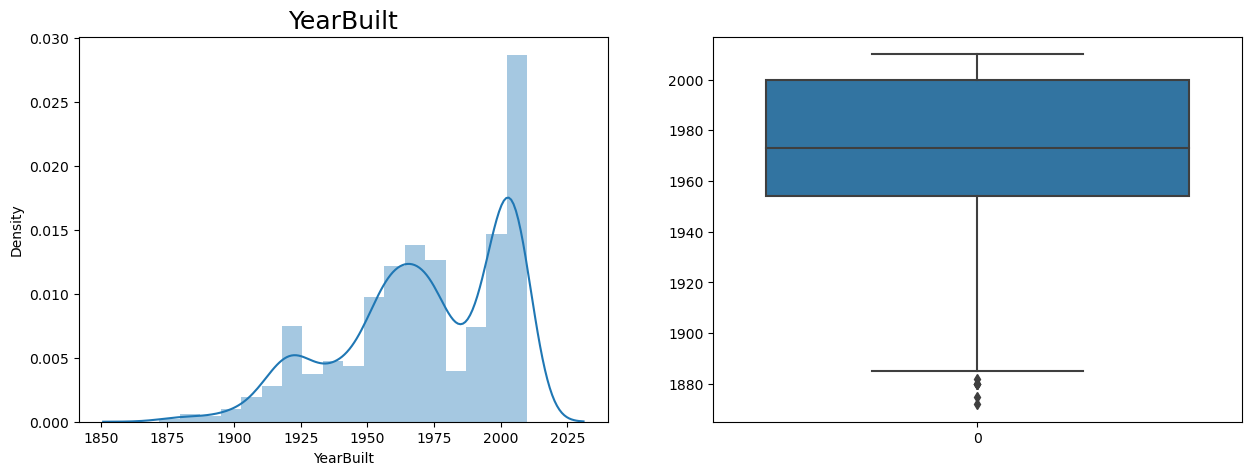

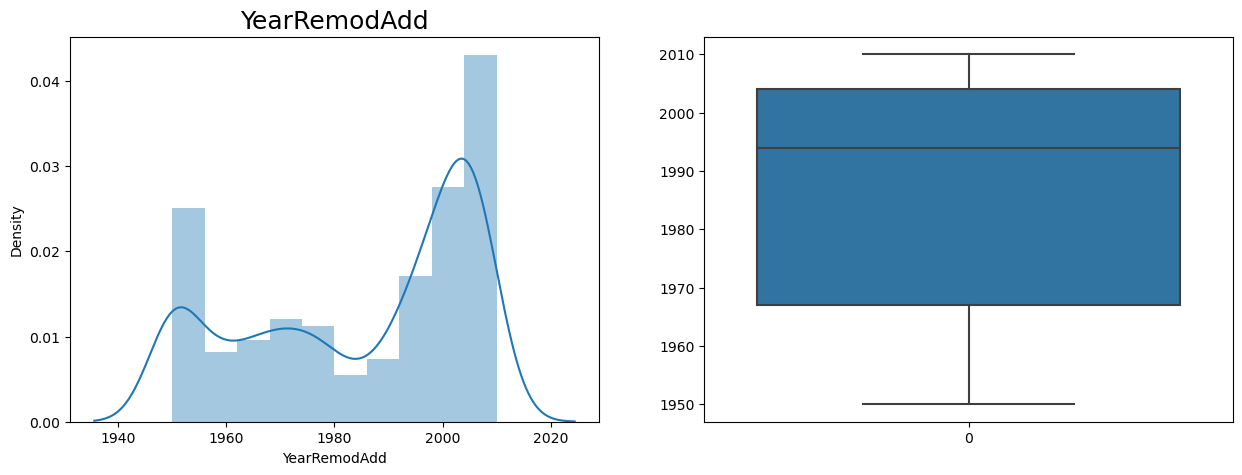

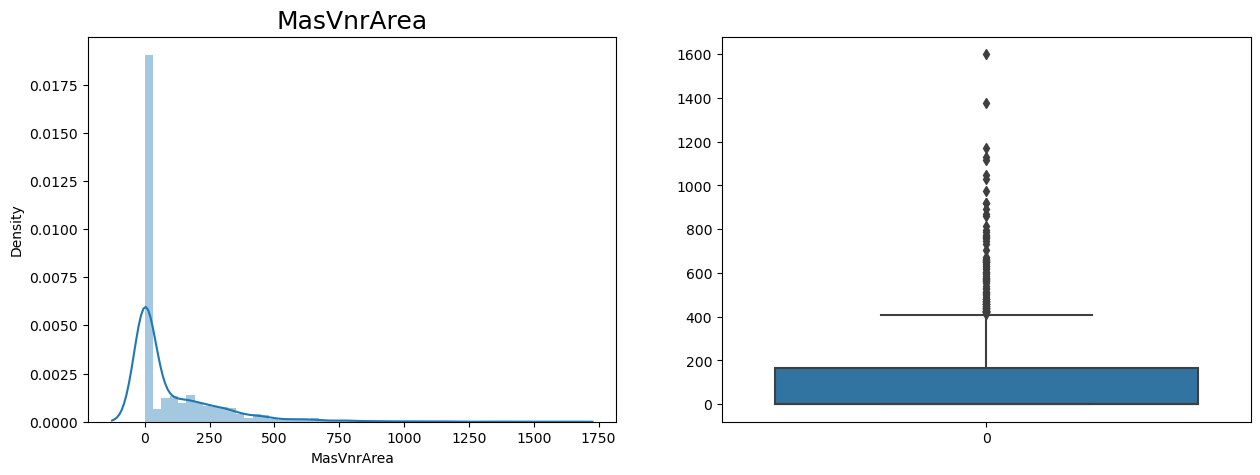

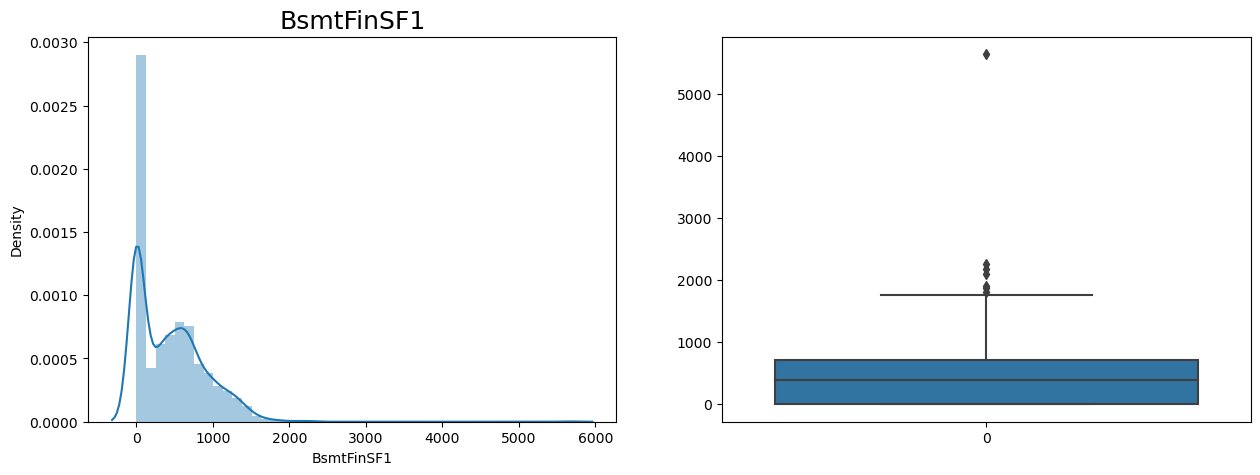

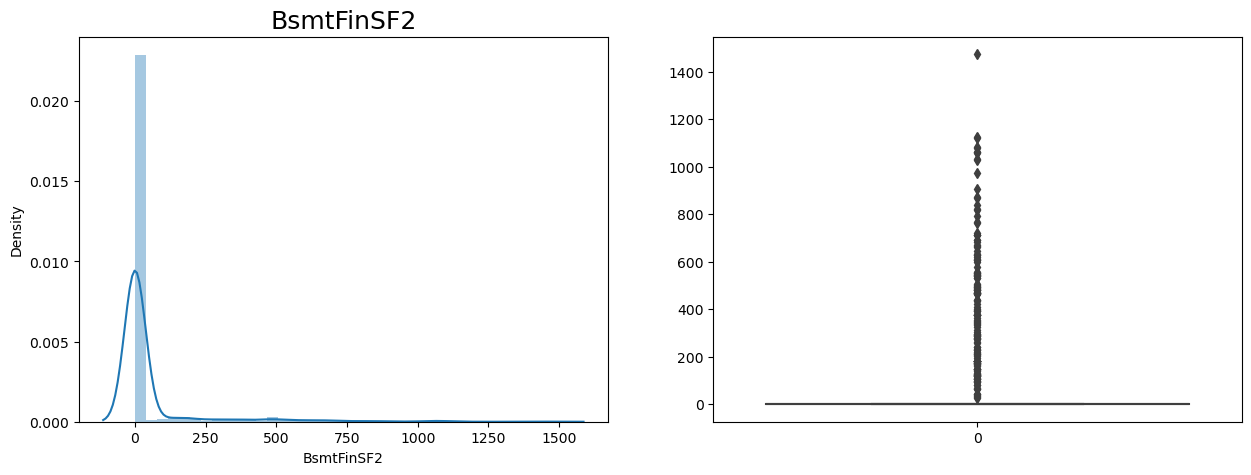

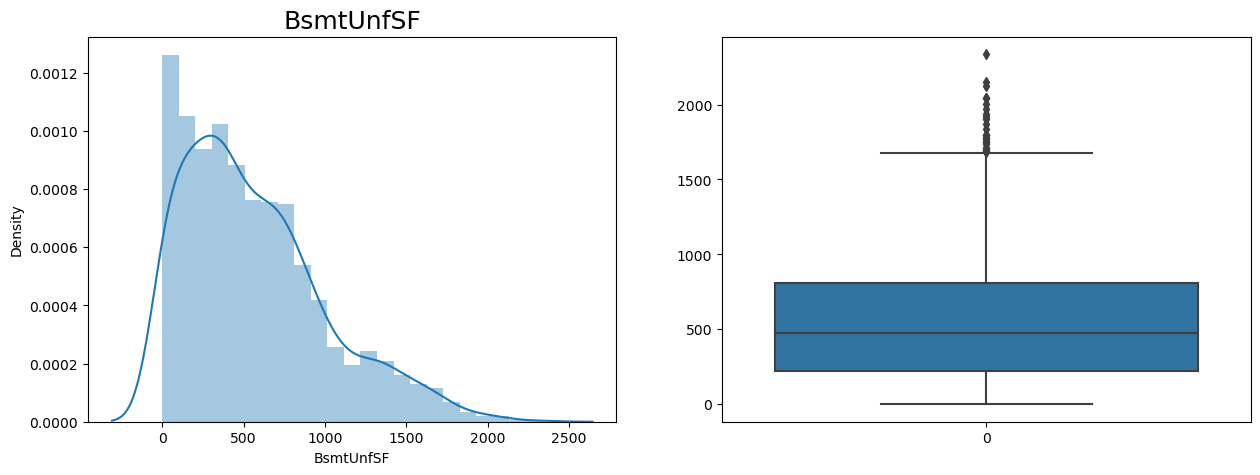

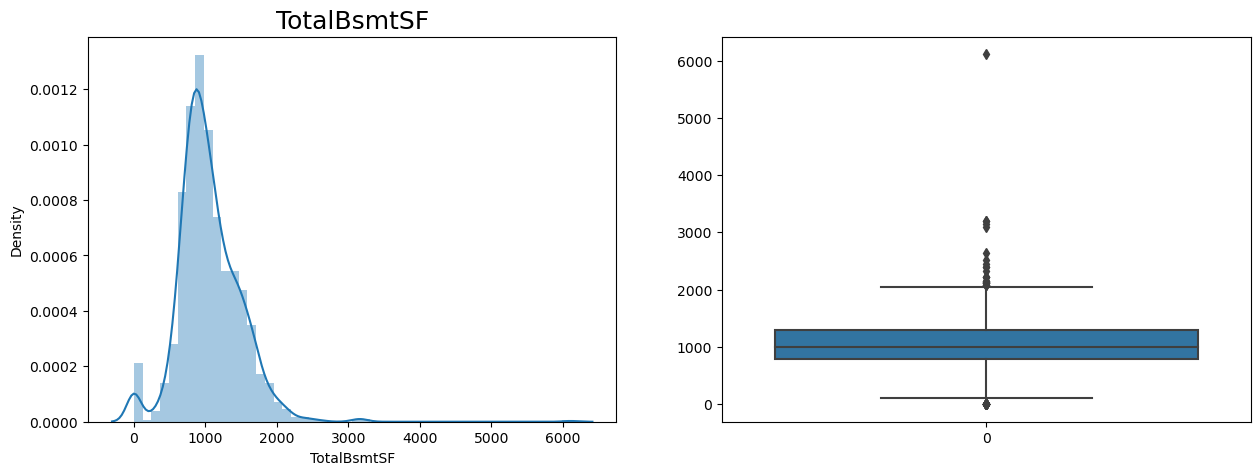

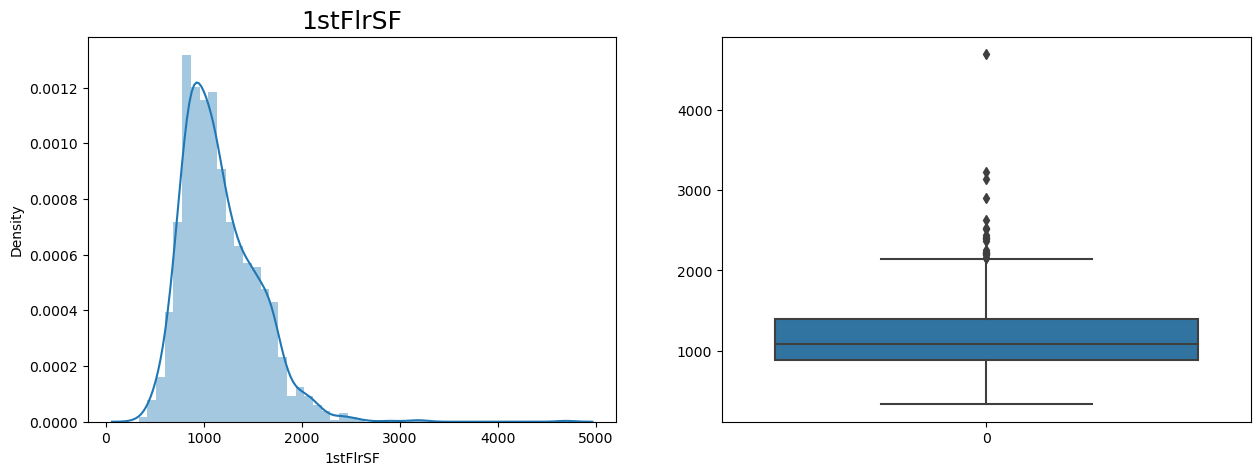

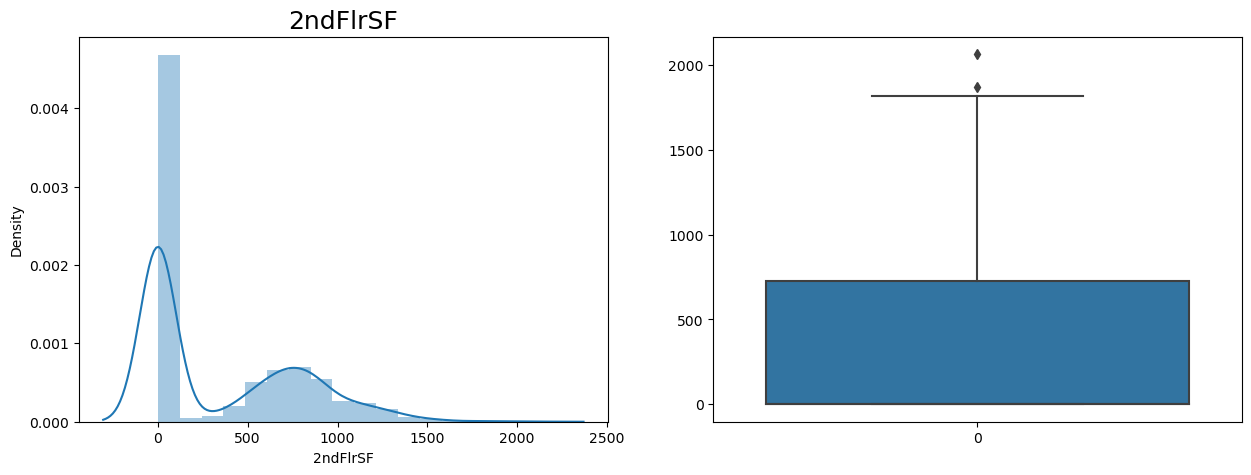

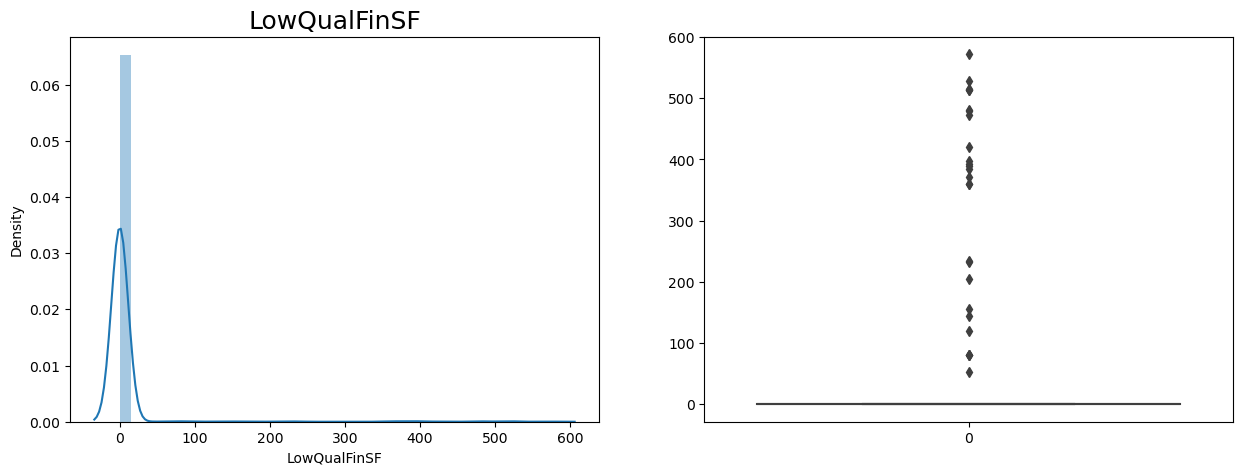

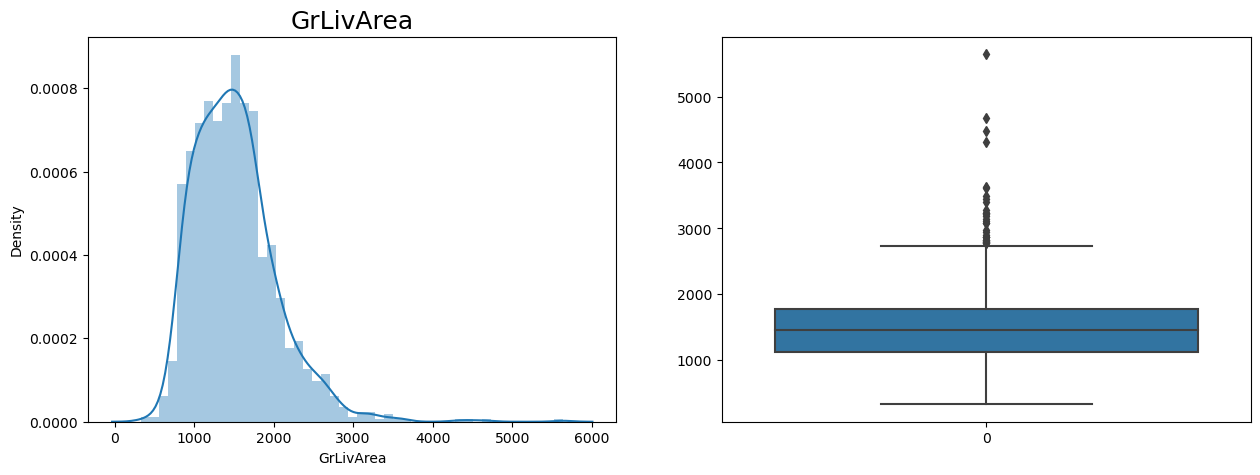

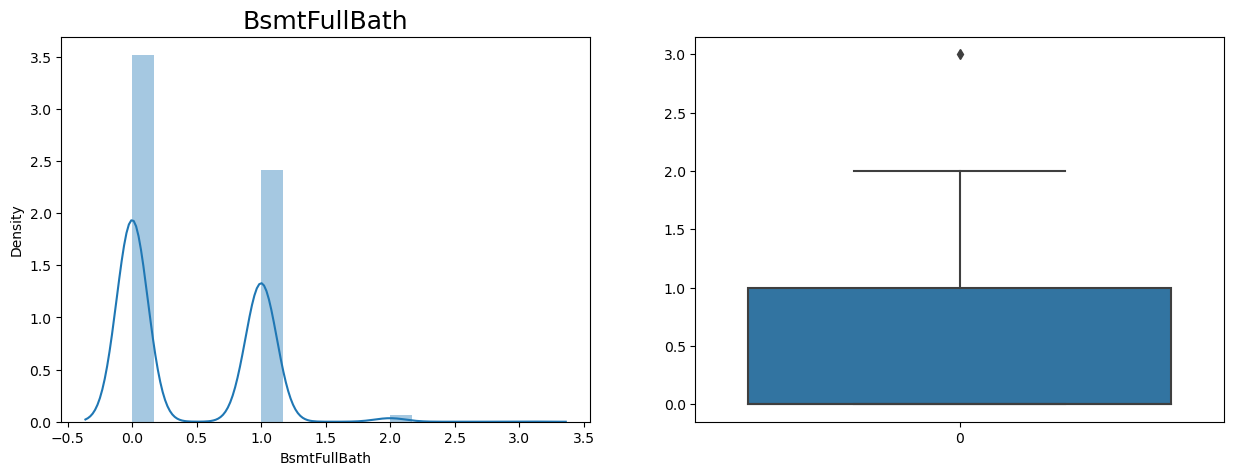

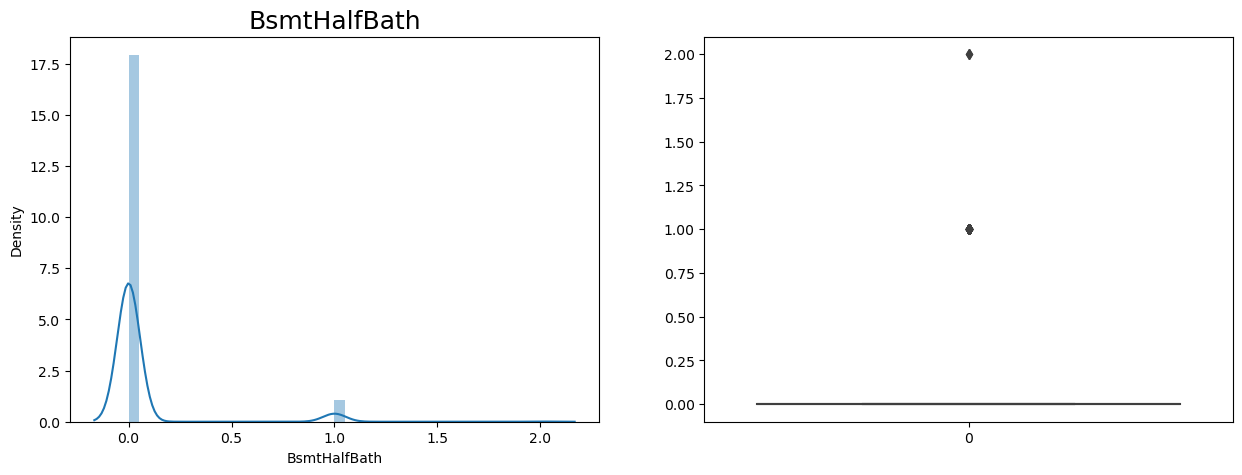

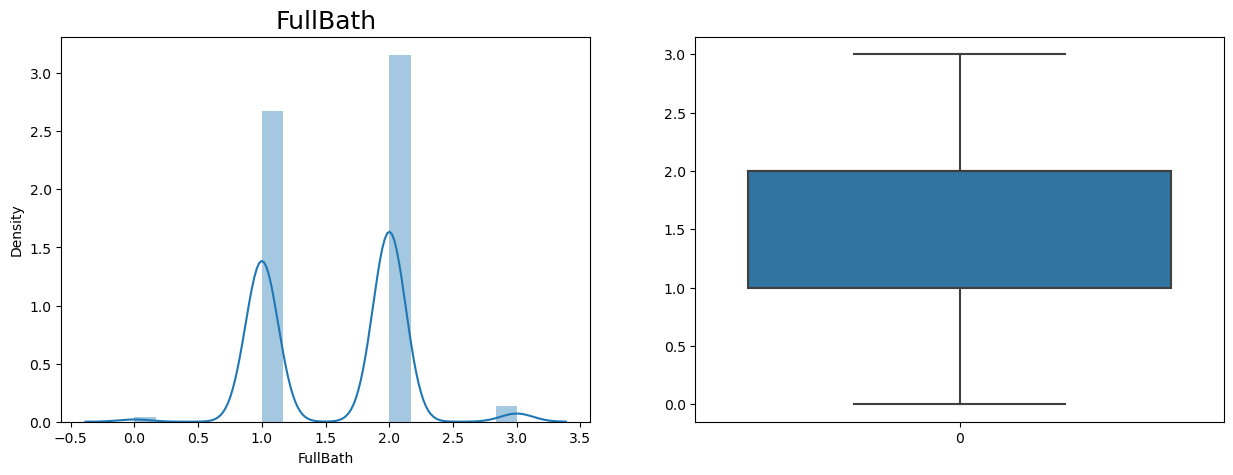

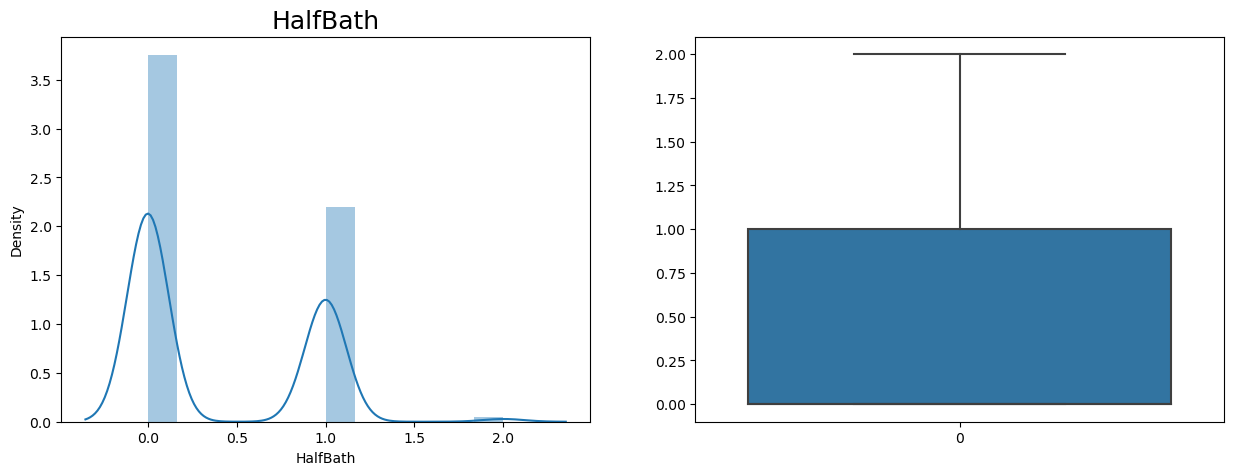

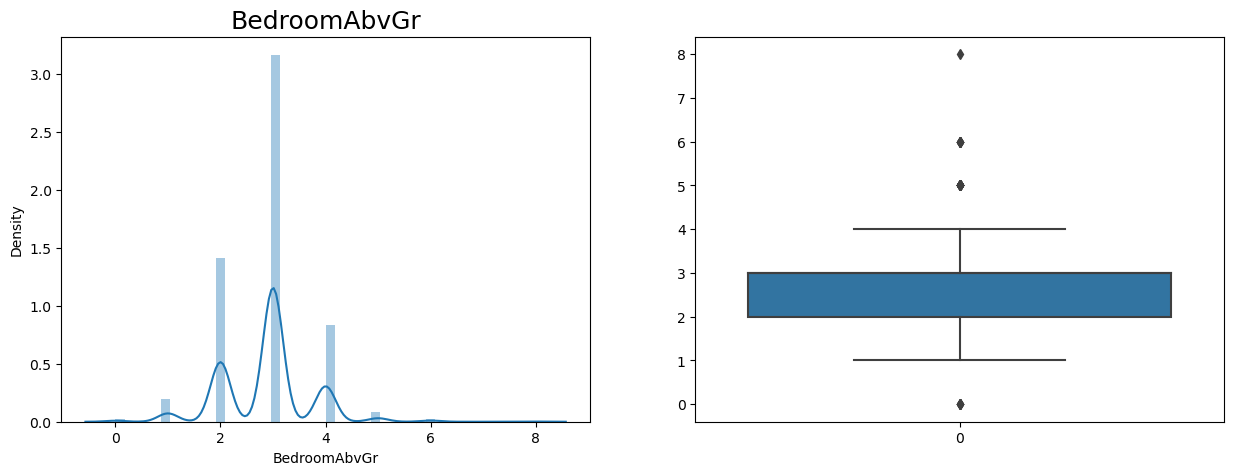

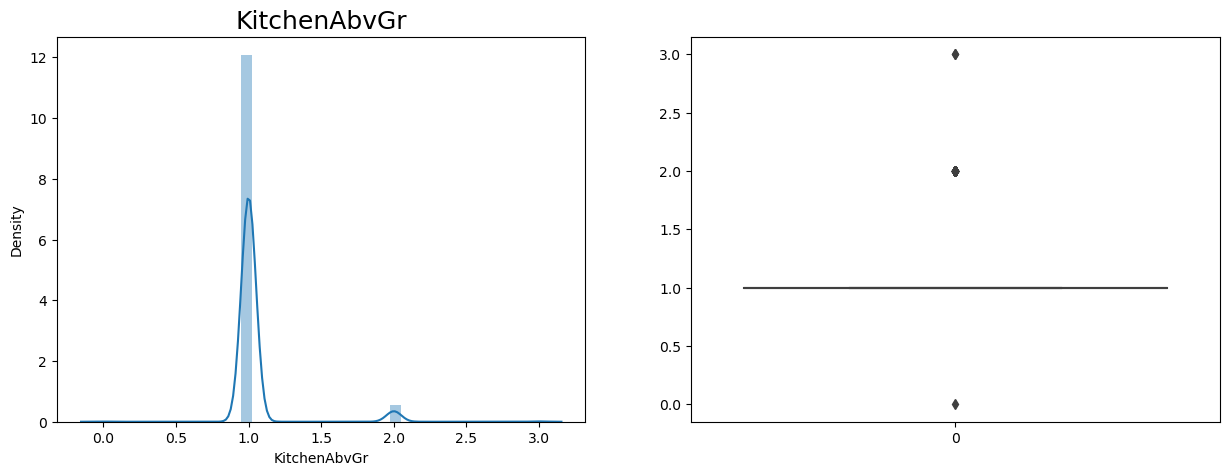

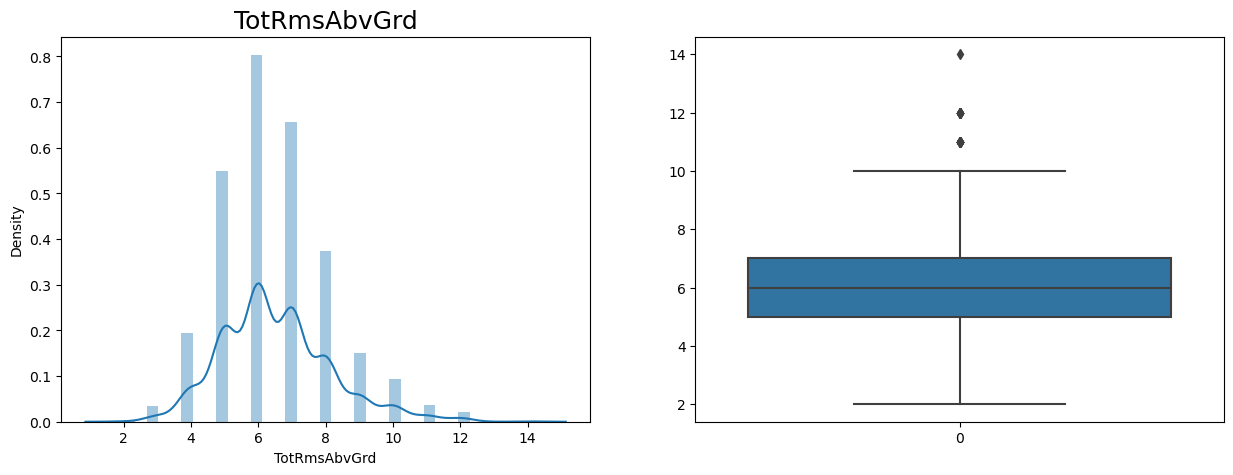

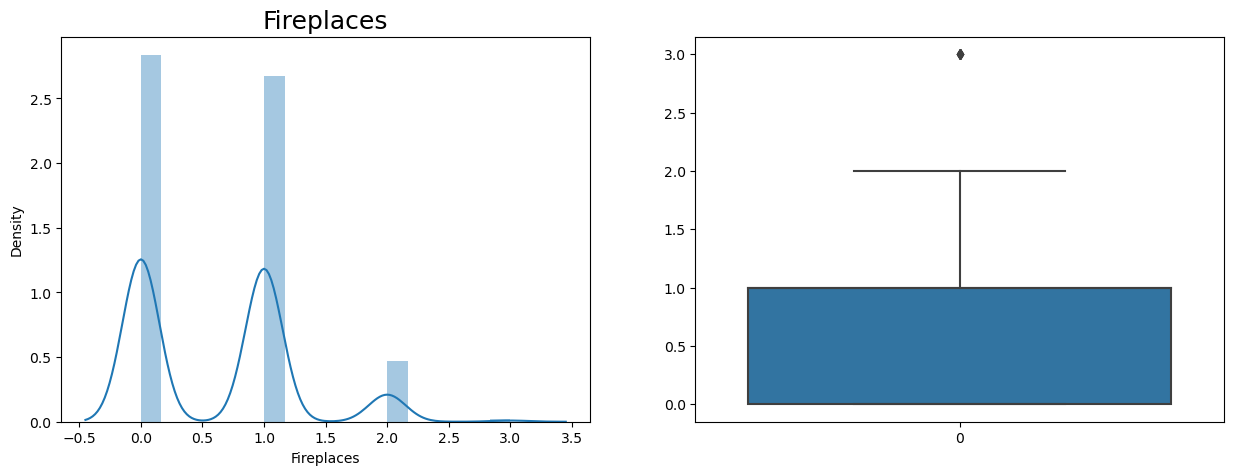

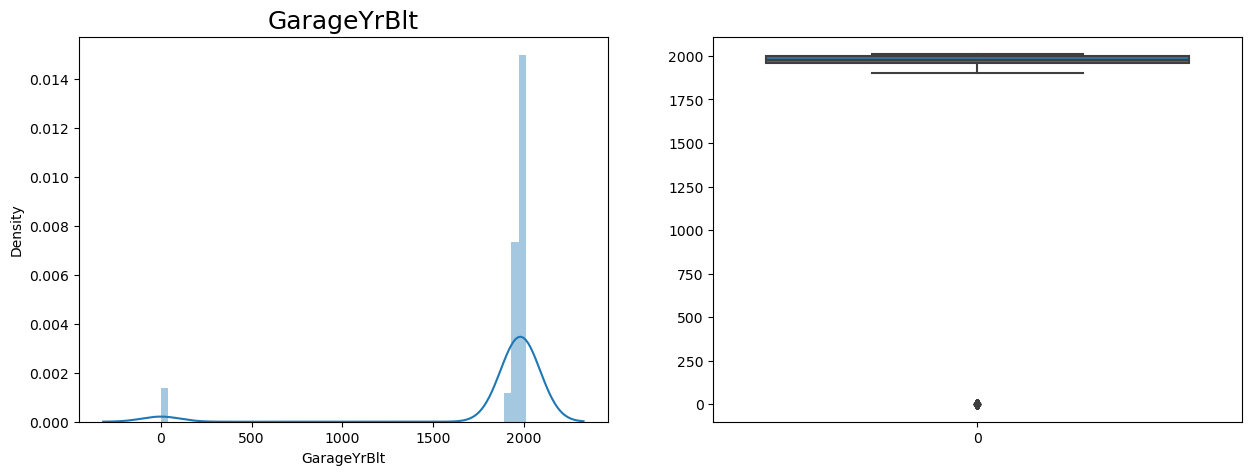

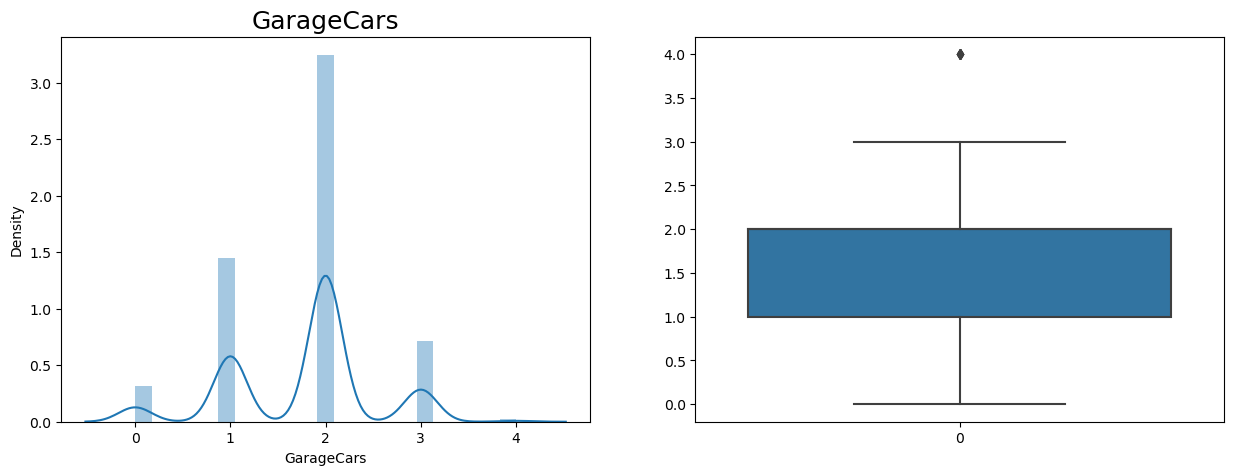

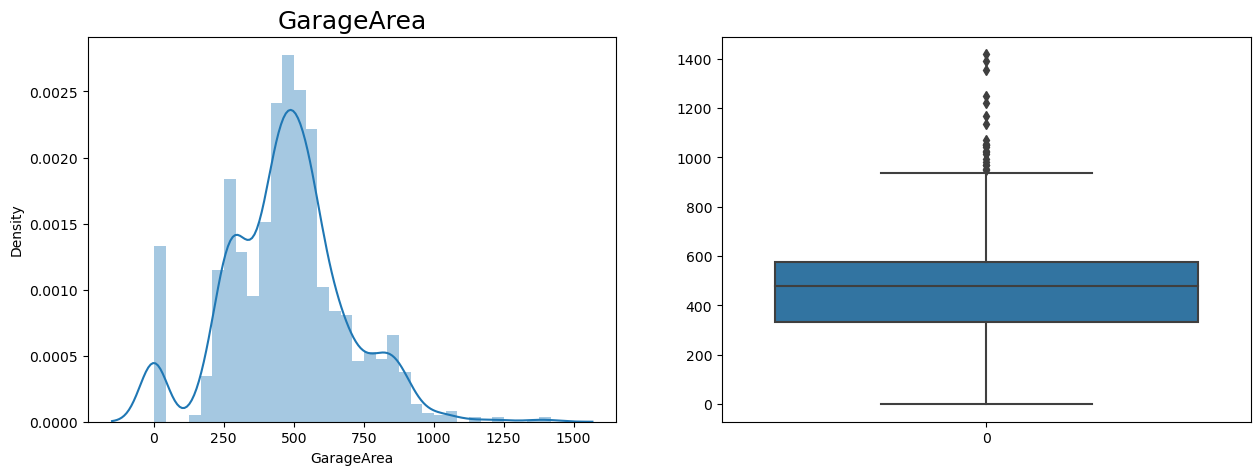

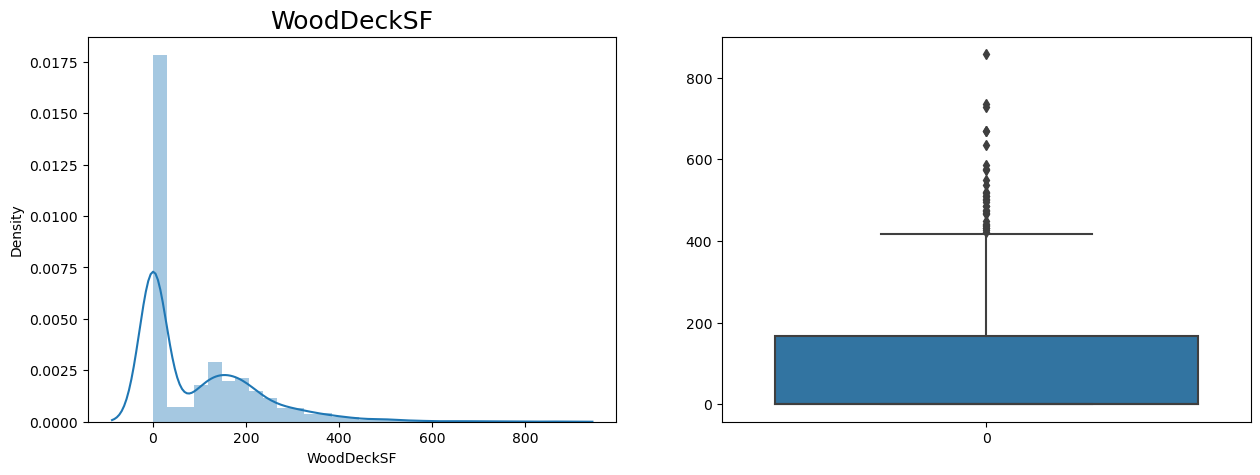

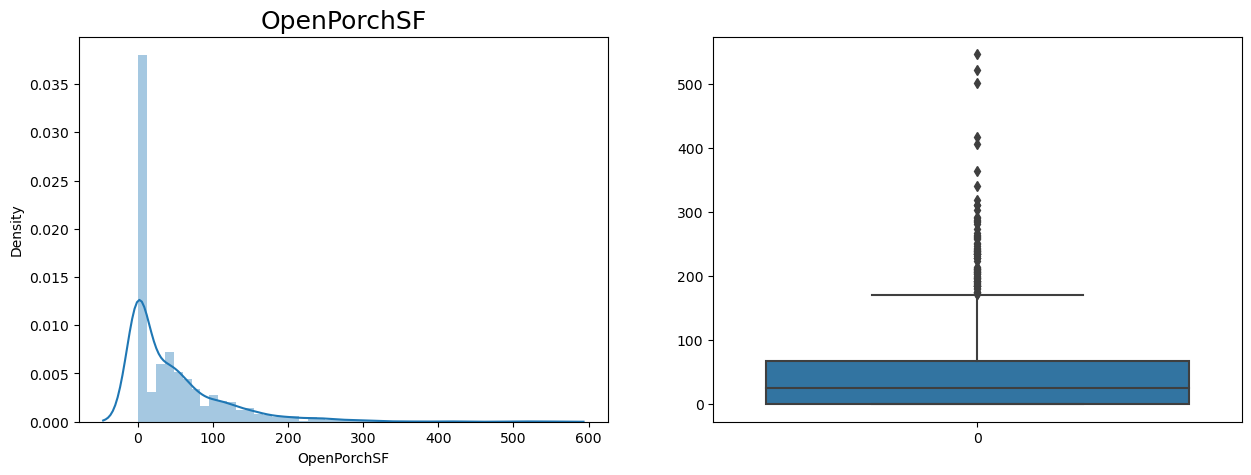

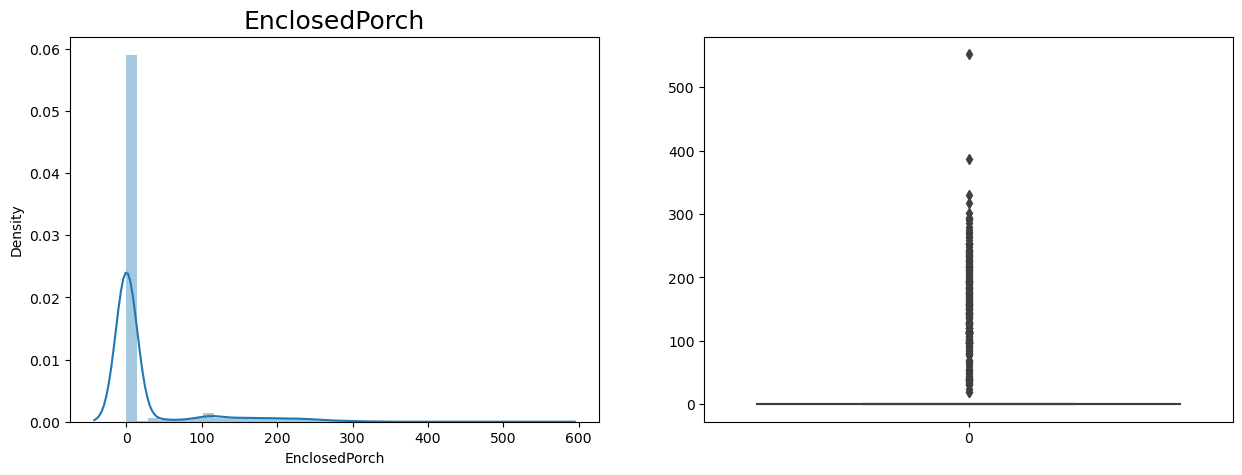

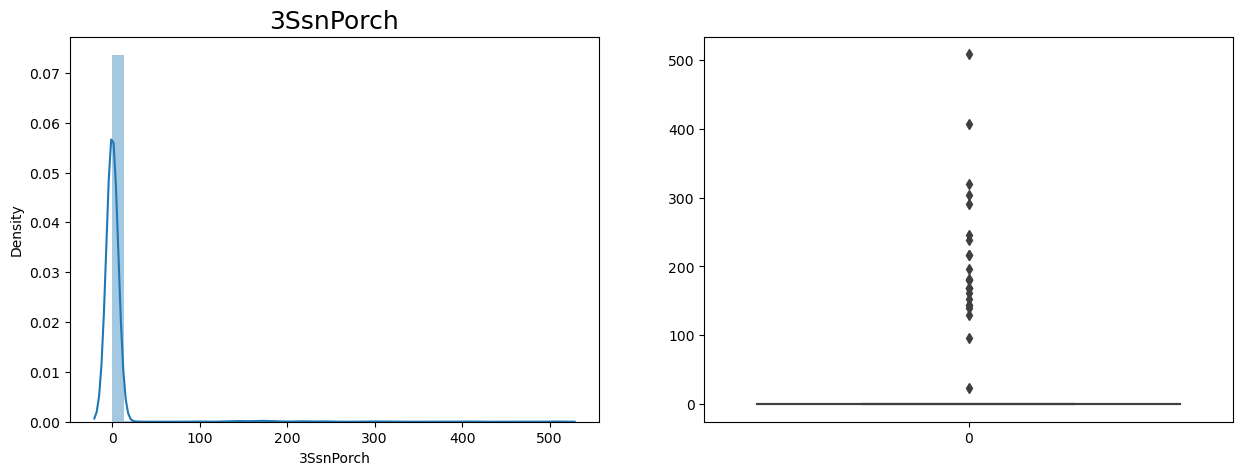

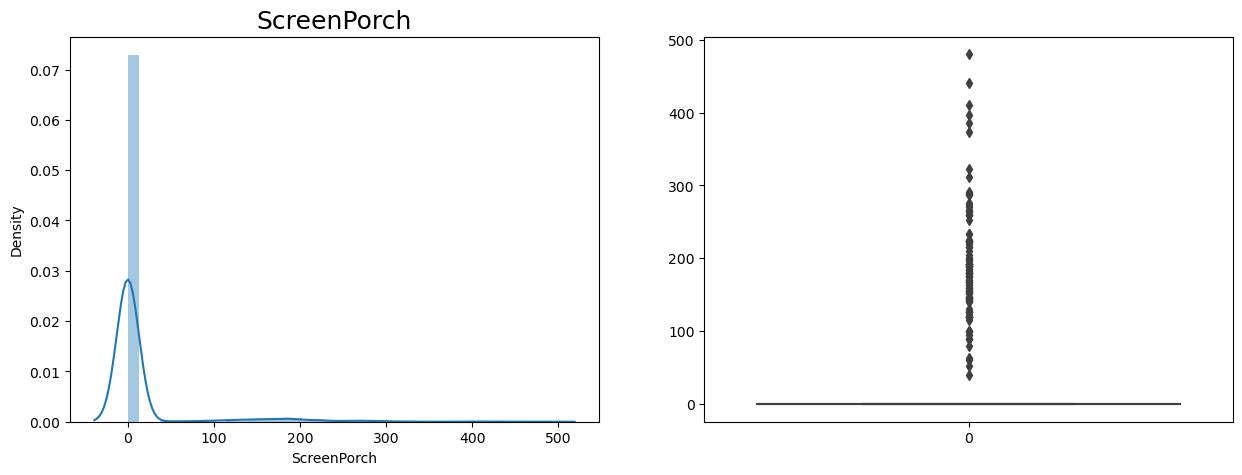

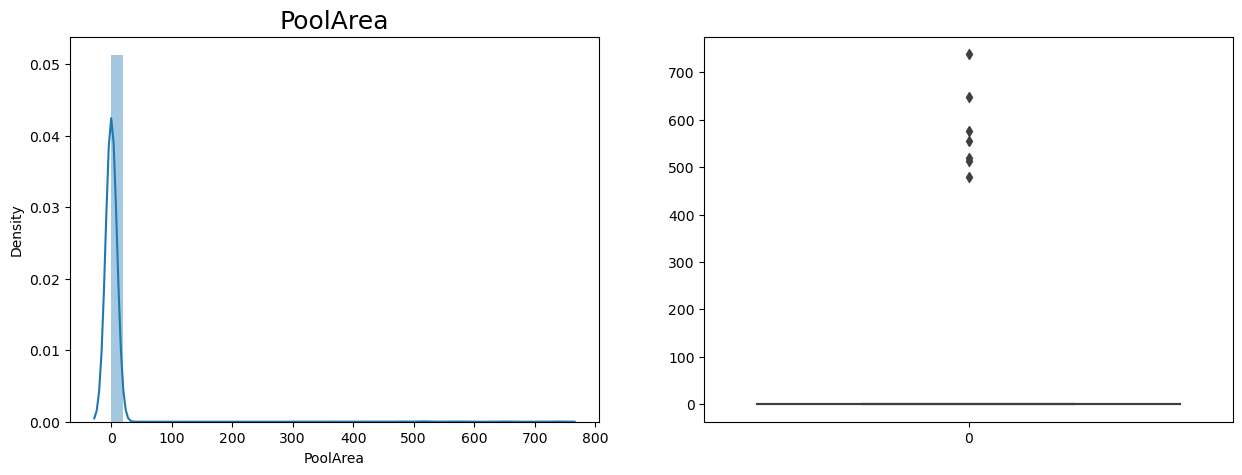

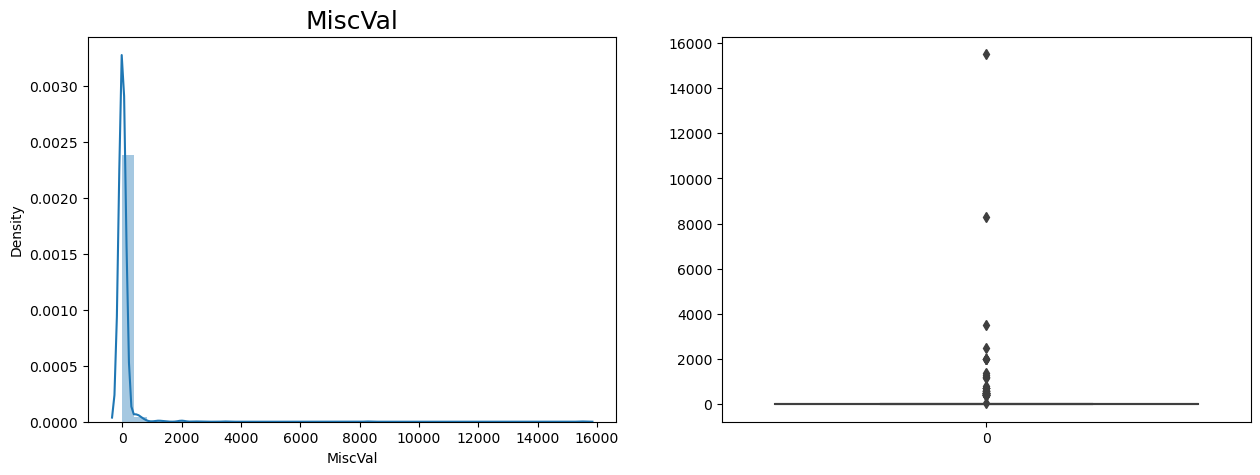

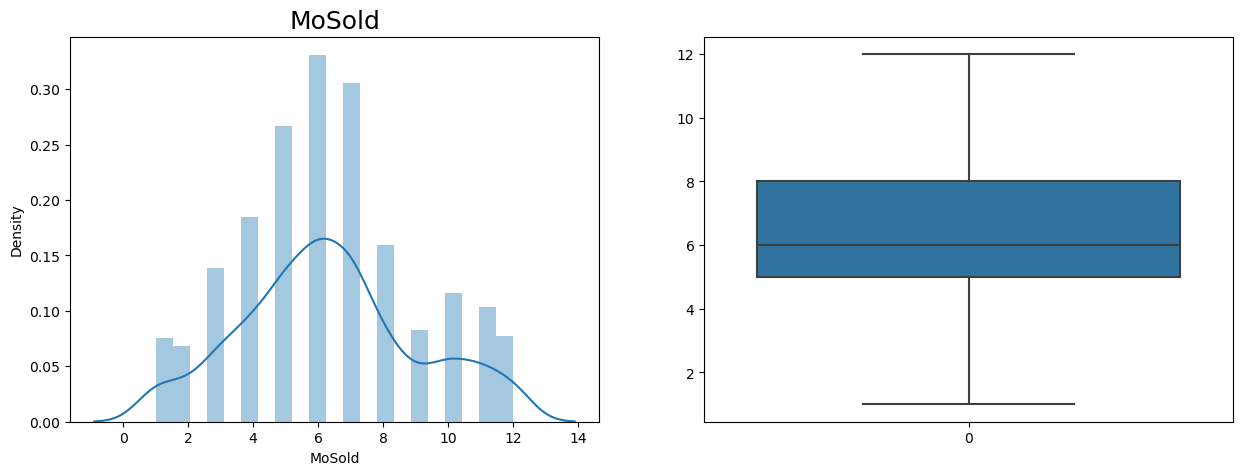

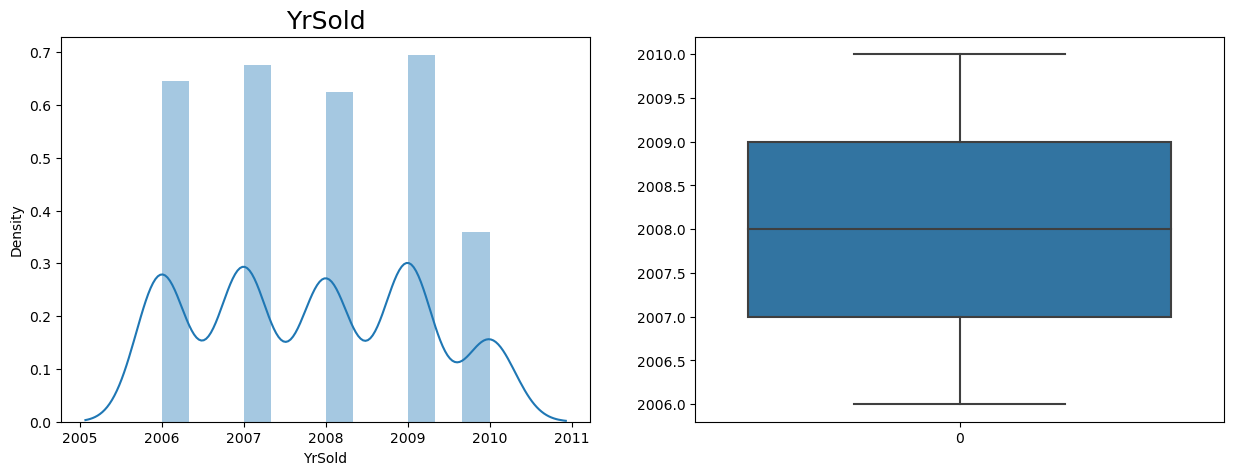

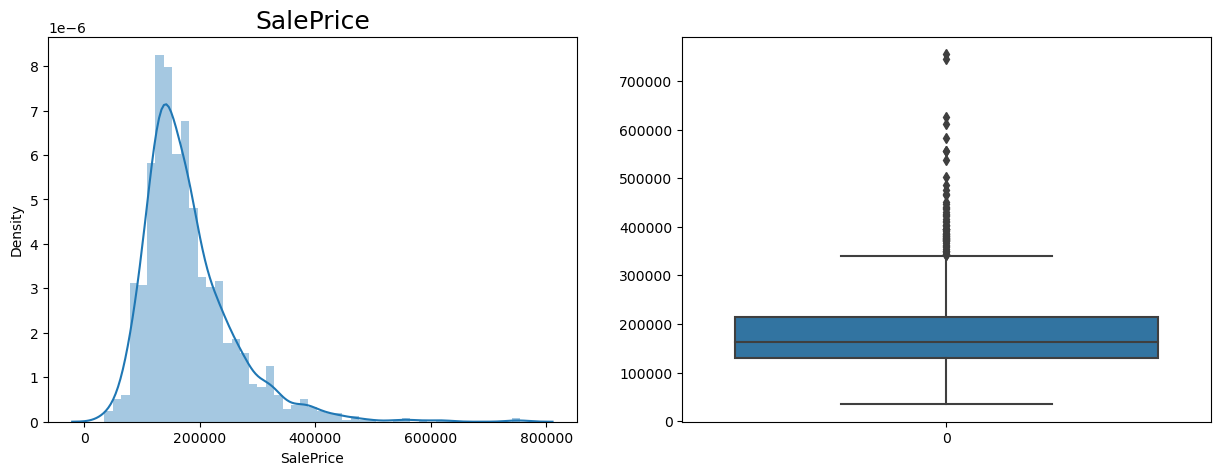

In [62]:
#Checking the numerical columns
#In this case both distribution plot, box plot to see ditribution. and outliers.
for col in num_housing_ds.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(num_housing_ds[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(num_housing_ds[col])
    plt.show() 

Asper the above distribution and box plot, below are the columns where there are outliers present.
- `LotFrontage`
- `LotArea`
- `MasVnrArea`
- `BsmtFinSF2`
- `LowQualFinSF`
- `GrLivArea`
- `OpenPorchSF`
- `EnclosedPorch`
- `3SsnPorch`
- `ScreenPorch`

 Many of the numerical columns are having non-normal distribution.

In [63]:
outlier_columns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

In [64]:
housing_ds[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,LowQualFinSF,GrLivArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,46.549315,5.844521,1515.463699,46.660274,21.954110,3.409589,15.060959
std,22.027677,9981.264932,180.731373,161.319273,48.623081,525.480383,66.256028,61.119149,29.317331,55.757415
min,21.000000,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,0.000000,0.000000,1464.000000,25.000000,0.000000,0.000000,0.000000
75%,79.000000,11601.500000,164.250000,0.000000,0.000000,1776.750000,68.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,1474.000000,572.000000,5642.000000,547.000000,552.000000,508.000000,480.000000


In [65]:
# Checking outliers for different quantile values
# 0-25% values, and 75-99% values
quantile_values = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.20,0.25,0.75,0.80,0.85,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
housing_ds[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].quantile(quantile_values)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,LowQualFinSF,GrLivArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0.01,21.00,1680.00,0.00,0.00,0.0,692.18,0.00,0.00,0.0,0.00
0.02,24.00,2124.74,0.00,0.00,0.0,768.00,0.00,0.00,0.0,0.00
0.03,30.00,2522.00,0.00,0.00,0.0,796.00,0.00,0.00,0.0,0.00
0.04,34.00,3095.04,0.00,0.00,0.0,828.80,0.00,0.00,0.0,0.00
0.05,35.95,3311.70,0.00,0.00,0.0,848.00,0.00,0.00,0.0,0.00
0.06,40.00,3862.52,0.00,0.00,0.0,864.00,0.00,0.00,0.0,0.00
0.07,41.00,4119.56,0.00,0.00,0.0,864.00,0.00,0.00,0.0,0.00
0.08,43.00,4426.00,0.00,0.00,0.0,885.44,0.00,0.00,0.0,0.00
0.09,45.31,4576.89,0.00,0.00,0.0,895.55,0.00,0.00,0.0,0.00
0.10,49.00,5000.00,0.00,0.00,0.0,912.00,0.00,0.00,0.0,0.00


There are no much variations with lower quantile values. For higher values (>95%)
`LotFrontage` which is continuosly increasing.   `LowQualFinSF`, `3SsnPorch` parameters has most of the values as 0, till 99%. For all other variables have more increase after 0.90 or .95 quantile. So try to remove outliers considering 95% as cutoff for all variables except `LotFrontage`

In [66]:
#Taking upto 95% values
for col in housing_ds.columns:
  for col in outlier_columns:
    housing_ds[col][housing_ds[col] >= housing_ds[col].quantile(0.95)] = housing_ds[col].quantile(0.95)

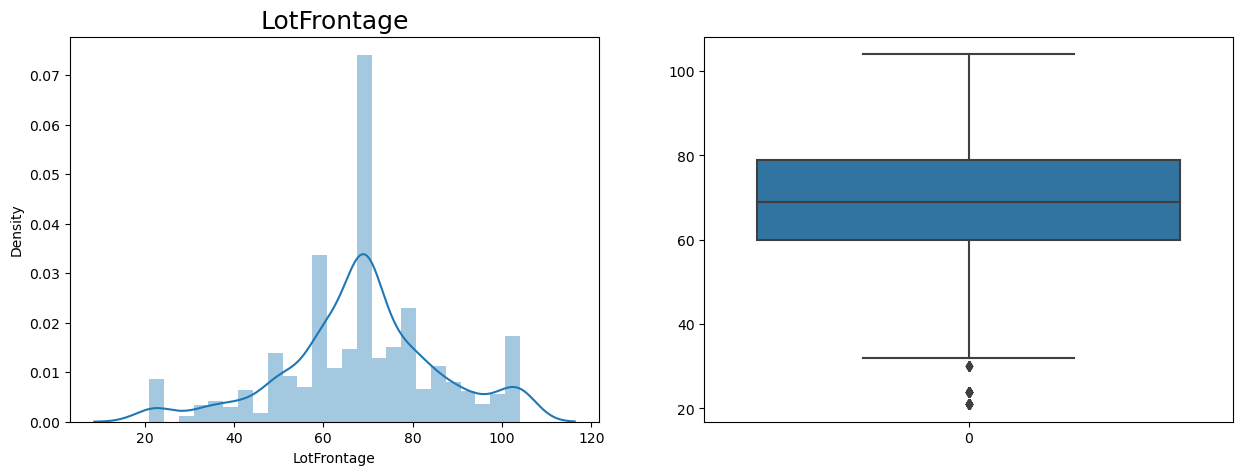

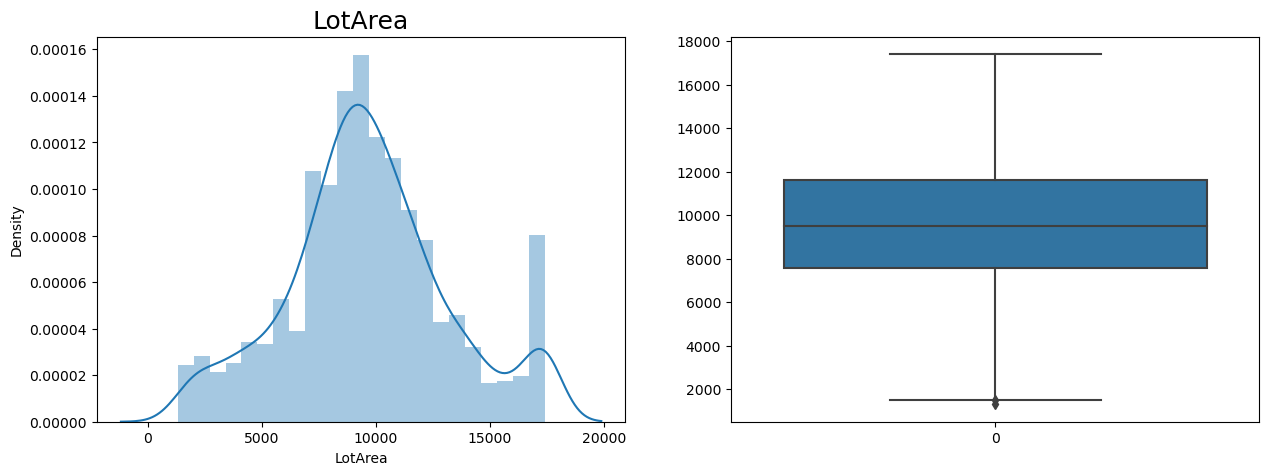

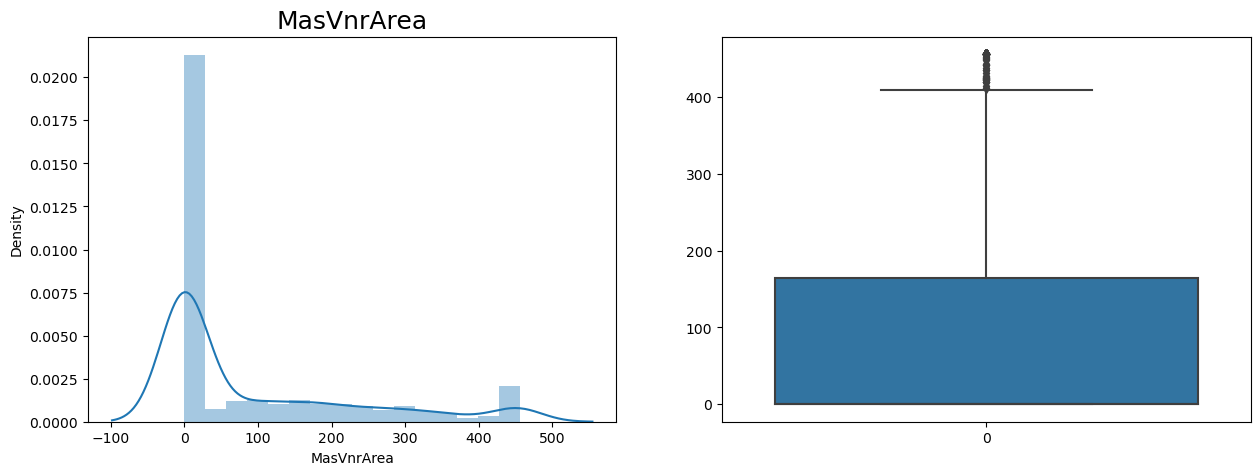

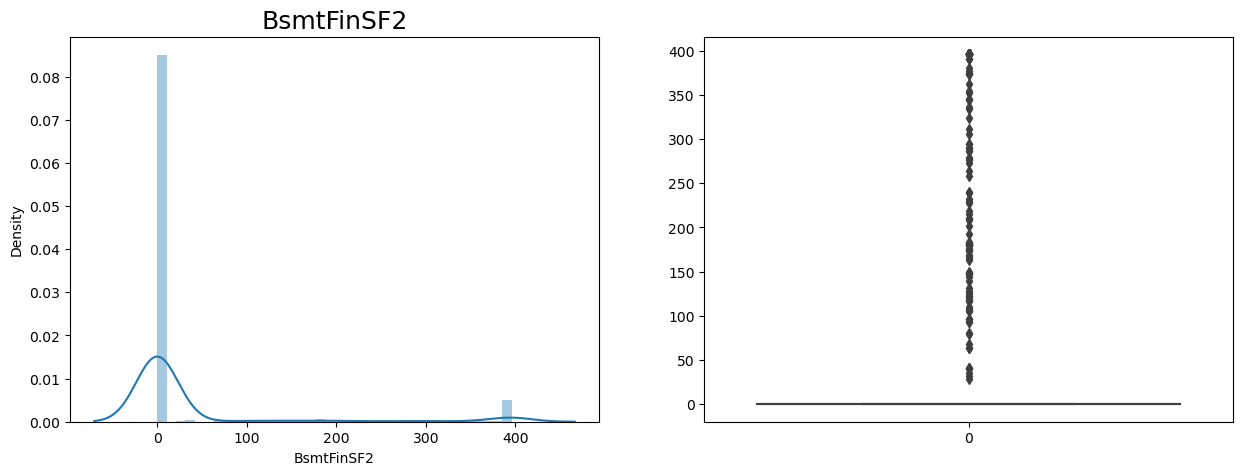

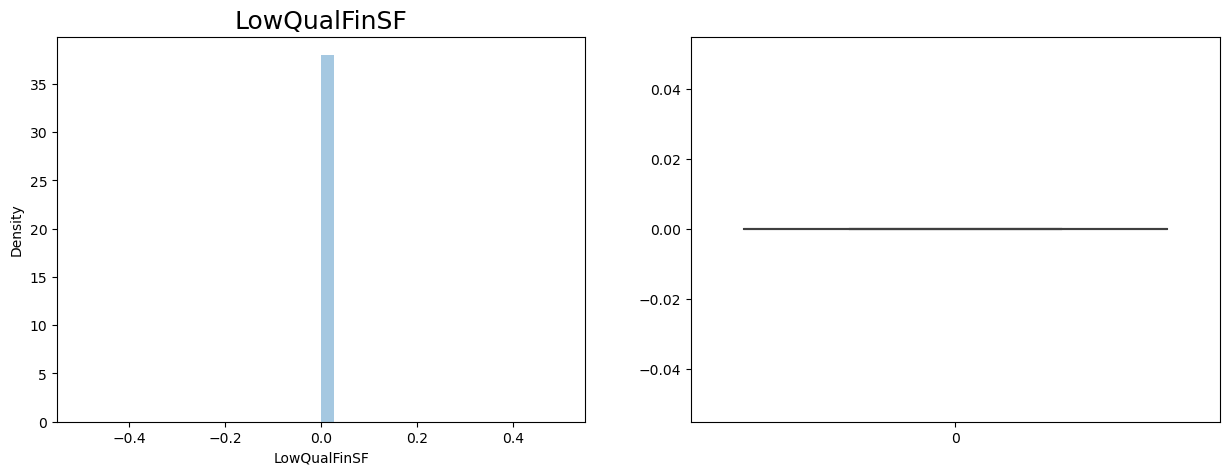

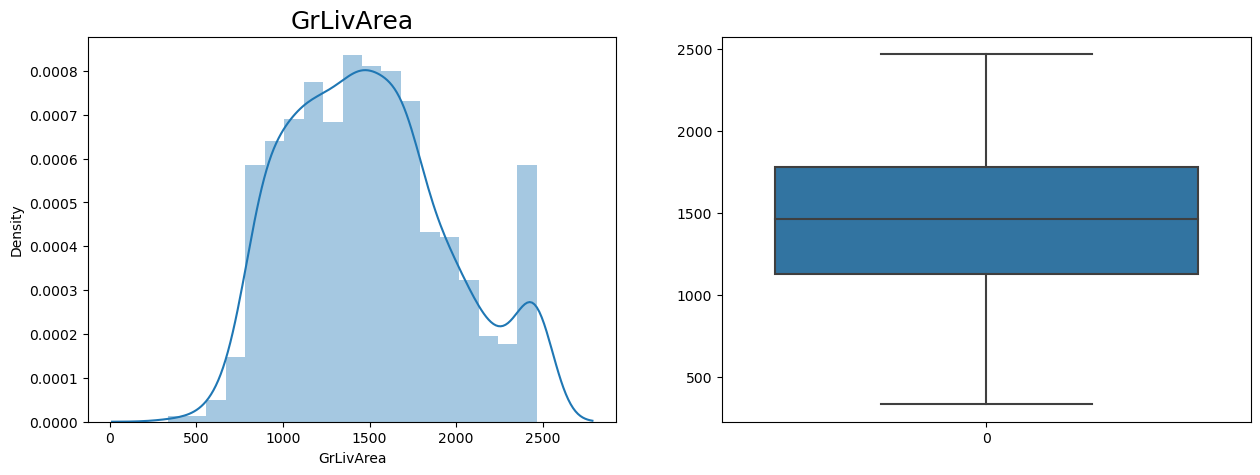

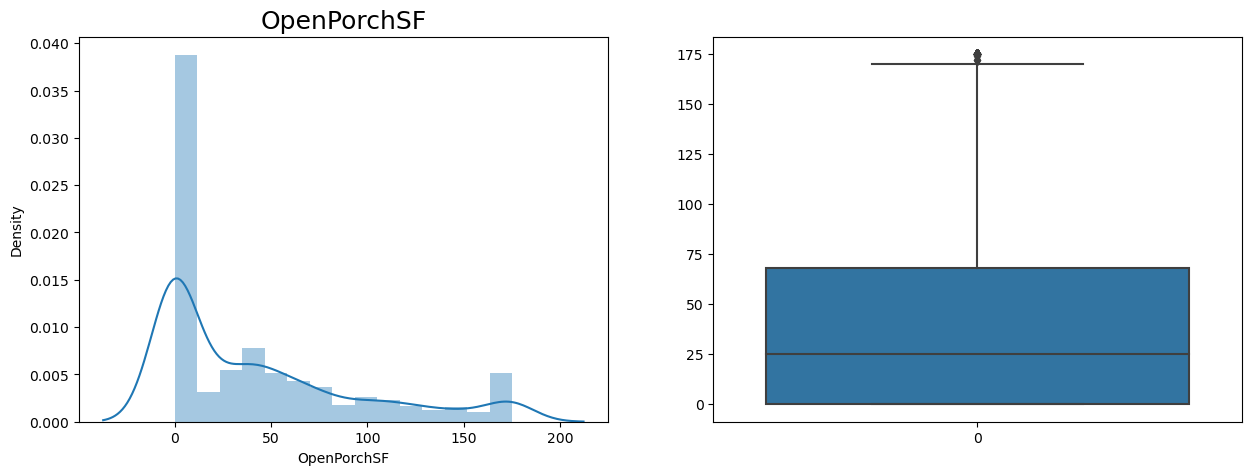

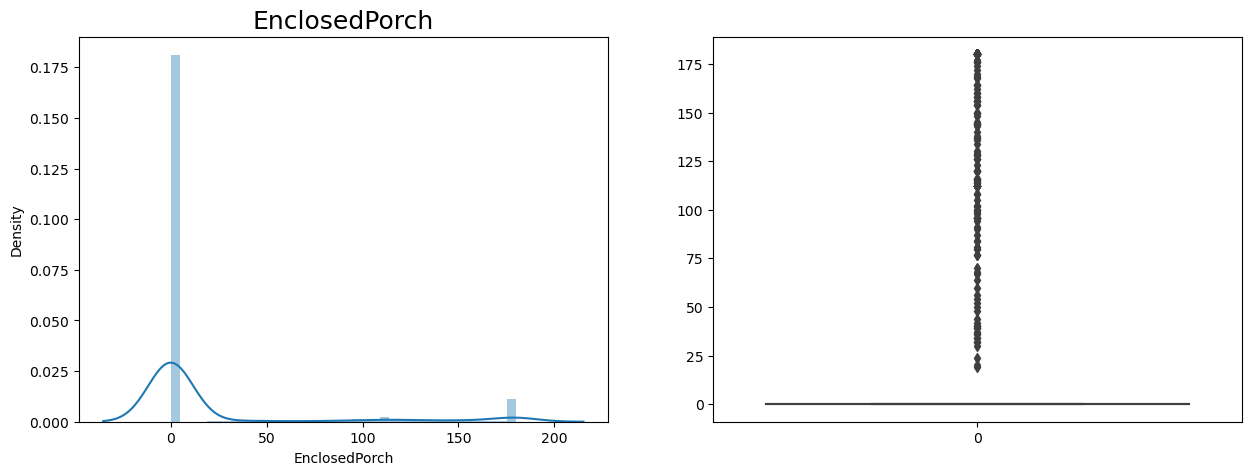

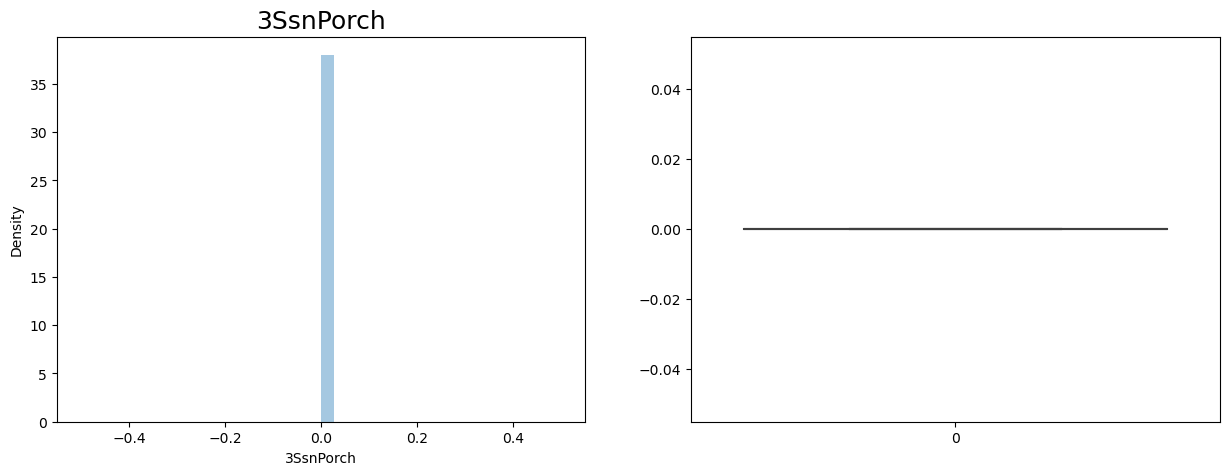

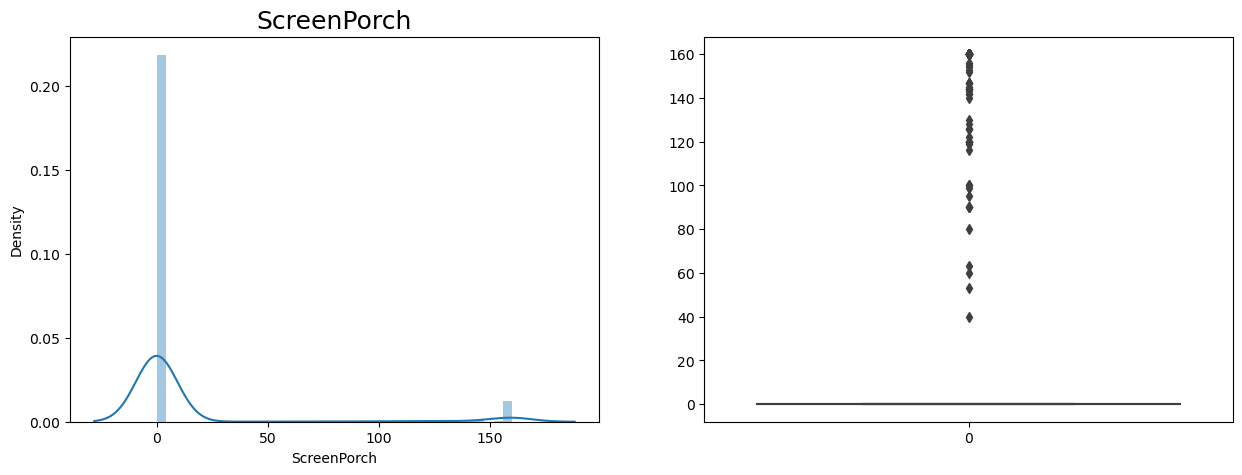

In [67]:
#Plot the numberical columns againfor outliers
for col in housing_ds.columns:
  if col in outlier_columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housing_ds[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_ds[col])
    plt.show() 

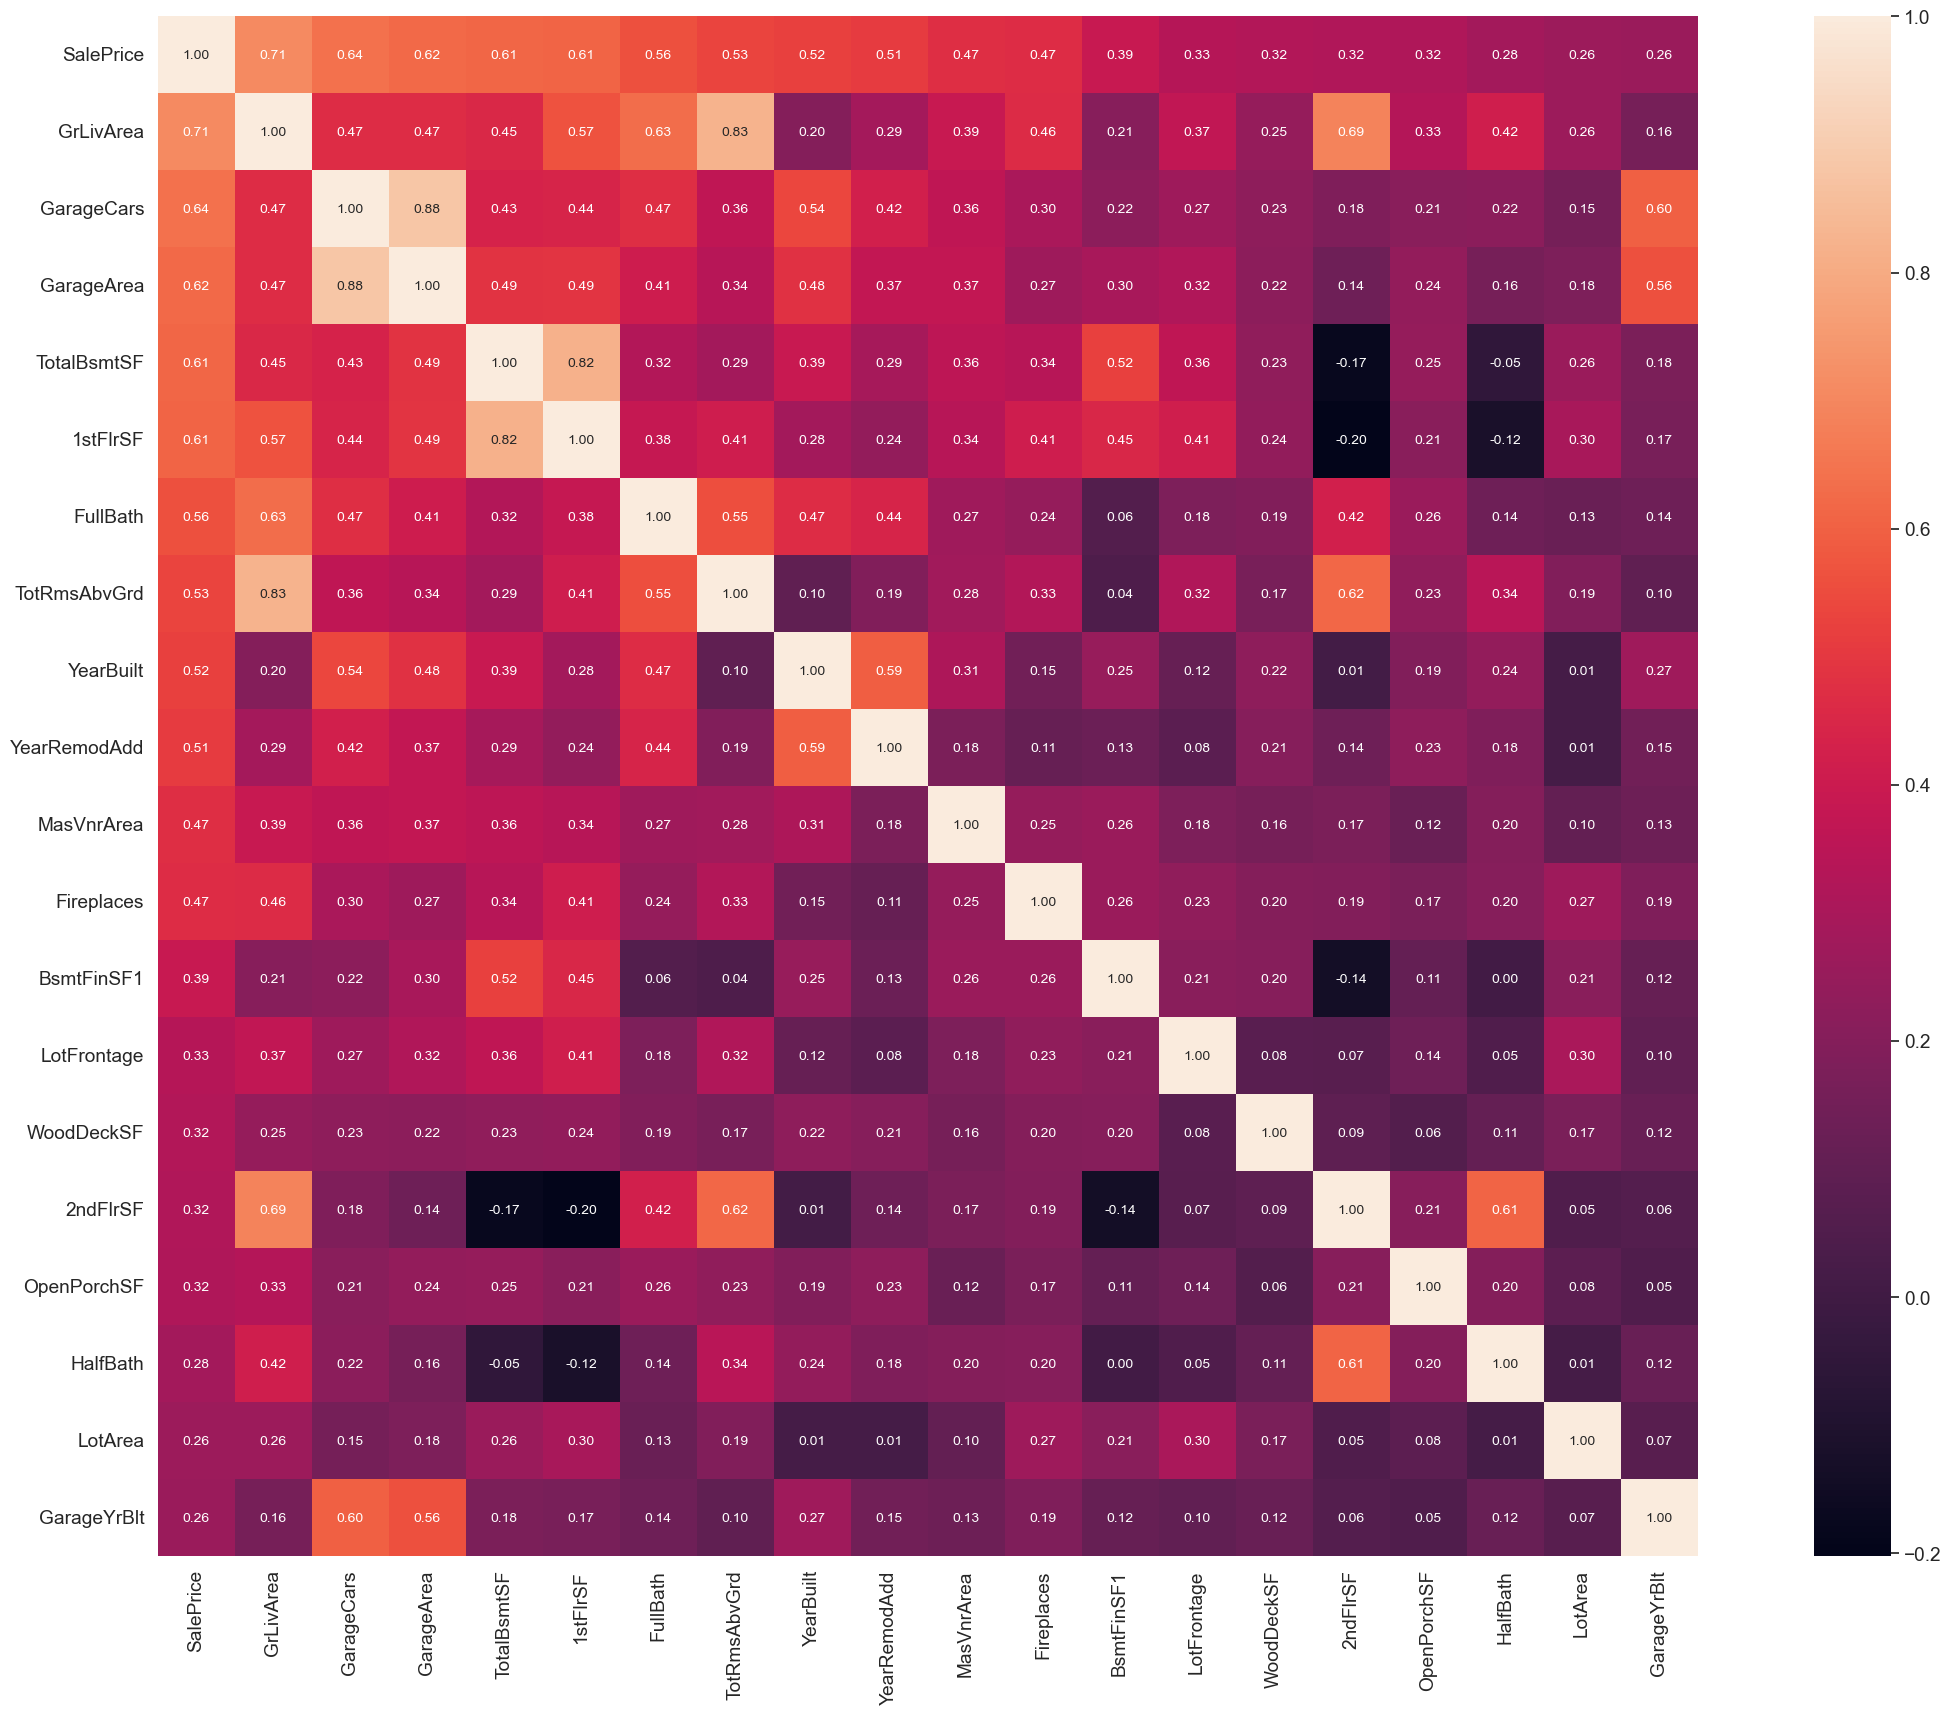

In [68]:
#Check from heatmap on the correlation coefficients 
# to understand the variables with highest correlation
# correlation matrix with top 15 variables that has higher correlation with 'SalePrice' Parameter
corrmat = num_housing_ds.corr()
#number of variables for heatmap
k = 20
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_housing_ds[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize = (30,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- Target variable `SalePrice` has higher correlation with `GrLivArea`, `GarageCars` and `GarageArea` parameters. 

- Dummy Variables:
  - Introduce Dummy variables for categorical columns.

#### Feature Engineering

In [69]:
## Create new column for the age of the house
housing_ds['Age'] = housing_ds['YrSold'] - housing_ds['YearBuilt']

In [70]:
## Drop the two columns from which we created new one
housing_ds.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

#### One hot encoding of the categorical columns

In [71]:
## One hot encoding the categorical columns
housing_ds_cat = housing_ds.select_dtypes(include='object')
orig_cat_columns = housing_ds_cat.columns
housing_data_cat_encode = pd.get_dummies(housing_ds_cat,dtype=int,drop_first=True)

In [72]:
housing_ds_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LotConfig      1460 non-null   object
 4   LandSlope      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   BldgType       1460 non-null   object
 7   HouseStyle     1460 non-null   object
 8   OverallQual    1460 non-null   object
 9   OverallCond    1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  ExterQual      1460 non-null   object
 14  Foundation     1460 non-null   object
 15  BsmtQual       1460 non-null   object
 16  BsmtCond       1460 non-null   object
 17  BsmtExposure   1460 non-null   object
 18  BsmtFinType1   1460 non-null

In [73]:
#Concatenate the dummy columns
housing_ds = pd.concat([housing_ds, housing_data_cat_encode], axis=1)

In [74]:
orig_cat_columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [75]:
#Remove the original columns
housing_ds = housing_ds.drop(orig_cat_columns,axis=1)

In [76]:
#Check the number of columns
housing_ds.shape

(1460, 197)

#### Model Building

In this section:
- Data will be split into test, train sets
- Scalaning the Numerical parameters with MinMaxScaler.
- MLR will be built (w/o dropping any of the parameters).
- Later Regularization methods will be applied.
- Stats will be compared to for MLR, Ridge, Lassso.

In [77]:
#Pick all columsn for X except "SalePrice" [target] column
X = housing_ds.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706,0.0,150,856,856,854,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61.0,0.0,0,0,0,0,2,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,80.0,9600.0,1976,0.0,978,0.0,284,1262,1262,0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0.0,0.0,0,0,0,0,5,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [78]:
#Pick target columnt 'SalePrice' for target column.
y = housing_ds['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [79]:
#Splitting the data in to train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=True)

In [80]:
#X Train Data size
X_train.shape

(1022, 196)

In [81]:
#X Test Data size
X_test.shape

(438, 196)

In [82]:
#y Train Data size
y_train.shape

(1022,)

In [83]:
#y test Data size
y_test.shape

(438,)

#### Scaling numerical columns

In [84]:
housing_num_col_list = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
housing_num_col_list

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [85]:
#Using MinMaxScaler scaler
scaler = MinMaxScaler()

#Scale the above numerical columns
X_train[housing_num_col_list] = scaler.fit_transform(X_train[housing_num_col_list])
X_test[housing_num_col_list] = scaler.transform(X_test[housing_num_col_list])

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 210 to 792
Columns: 196 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(32), int32(164)
memory usage: 918.2 KB


In [87]:
X_train.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,0.554217,0.259185,0.000000,0.000000,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,0.210059,0.333333,0.0,0.333333,0.0,0.250,0.0,0.181818,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.533333,0.0,0.0,0.0,0.0,0.272727,0.610294,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
318,0.831325,0.528983,0.716667,0.561404,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.0,1.000000,0.333333,0.0,0.666667,0.5,0.500,0.0,0.545455,0.333333,0.991542,0.75,0.462623,0.396733,0.342857,0.800000,0.0,0.0,0.0,0.0,0.272727,0.117647,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

#### Linear Regression:

- Initially Multiple Linear Regression Model (MLR) is built without dropping any parameters.

In [88]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predictions on the basis of the model
y_train_pred = lm.predict(X_train)
y_train_pred

array([11.40344238, 12.73626709, 11.63345337, ..., 12.6036377 ,
       11.60925293, 12.48129272])

In [90]:
#Training R-Squared
lr_train_r2_score = r2_score(y_train, y_train_pred)
lr_train_r2_score

0.9371460384909174

In [91]:
y_test_pred = lm.predict(X_test)

In [92]:
#Testing R-Squared
lr_test_r2_score = r2_score(y_test, y_test_pred)
lr_test_r2_score

-1.0870940702117382e+21

In [93]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
lr_train_rss = np.sum(np.square(y_train - y_train_pred))
print(lr_train_rss)
lr_train_mse = mean_squared_error(y_train, y_train_pred)
print(lr_train_mse)
# Root Mean Squared Error
lr_train_rmse = lr_train_mse**0.5
print(lr_train_rmse)

10.102234810968717
0.009884769873746299
0.09942217998890539


In [94]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
lr_test_rss = np.sum(np.square(y_test - y_test_pred))
print(lr_test_rss)
lr_test_mse = mean_squared_error(y_test, y_test_pred)
print(lr_test_mse)
# Root Mean Squared Error
lr_test_rmse = lr_test_mse**0.5
print(lr_test_rmse)

7.83453162254221e+22
1.7887058498954818e+20
13374250819.748678


#### Ridge Regression

In [95]:
# list of alphas to tune
ridge_tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}

ridge_reg = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge_reg, 
                        param_grid = ridge_tuned_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [96]:
#Find the optimal value of alpha
ridge_model_cv.best_params_

{'alpha': 4.0}

In [97]:
#Check the model results
ridge_model_cv.cv_results_

{'mean_fit_time': array([0.02263236, 0.01566052, 0.01475005, 0.01876278, 0.01881957,
        0.01562533, 0.01562195, 0.01636791, 0.01251802, 0.015625  ,
        0.02081957, 0.01872249, 0.01681204, 0.01562958, 0.01563959,
        0.01801085, 0.02504649, 0.01516094, 0.02188725, 0.025002  ,
        0.02499161, 0.01875319, 0.02811494, 0.01563578, 0.02045565,
        0.02393489, 0.0206111 ]),
 'std_fit_time': array([7.13858477e-03, 7.41502479e-05, 1.74585523e-03, 6.25203165e-03,
        6.16757152e-03, 3.30821909e-05, 2.16441003e-05, 1.54516965e-03,
        6.25929929e-03, 5.11795344e-06, 6.57880671e-03, 6.24071169e-03,
        2.30713588e-03, 8.39206305e-06, 9.90233399e-03, 4.76814770e-03,
        7.66001368e-03, 9.63806387e-03, 7.64427956e-03, 7.68107834e-03,
        7.64907251e-03, 6.24900469e-03, 6.24716566e-03, 2.67494171e-05,
        6.28485179e-03, 7.05824877e-03, 8.95007264e-03]),
 'mean_score_time': array([0.00699005, 0.        , 0.003126  , 0.0106504 , 0.00312743,
        0.006253

In [98]:
#optimum alpha is 4, so fit the model at 4
alpha = 4
ridge_reg = Ridge(alpha=alpha)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=4)

In [99]:
#Predict
y_train_pred = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)

In [100]:
#R-Square on training data
ridge_train_r2_score = r2_score(y_train, y_train_pred)
ridge_train_r2_score

0.9268049238935735

In [101]:
#R-Square on test data
ridge_test_r2_score = r2_score(y_test, y_pred)
ridge_test_r2_score

0.8852367370011864

In [102]:
#Model Parameters of Ridge
ridge_model_parameters = list(sorted(ridge_reg.coef_))
ridge_model_parameters.insert(0, ridge_reg.intercept_)
ridge_model_parameters = [round(x, 4) for x in ridge_model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
list(zip(cols, ridge_model_parameters))

[('LotFrontage', 11.2793),
 ('LotArea', -0.1543),
 ('YearRemodAdd', -0.1495),
 ('MasVnrArea', -0.1465),
 ('BsmtFinSF1', -0.1139),
 ('BsmtFinSF2', -0.1065),
 ('BsmtUnfSF', -0.0923),
 ('TotalBsmtSF', -0.0912),
 ('1stFlrSF', -0.0894),
 ('2ndFlrSF', -0.0768),
 ('LowQualFinSF', -0.074),
 ('GrLivArea', -0.0727),
 ('BsmtFullBath', -0.0696),
 ('BsmtHalfBath', -0.067),
 ('FullBath', -0.0653),
 ('HalfBath', -0.0636),
 ('BedroomAbvGr', -0.0629),
 ('KitchenAbvGr', -0.0559),
 ('TotRmsAbvGrd', -0.0552),
 ('Fireplaces', -0.0528),
 ('GarageYrBlt', -0.0527),
 ('GarageCars', -0.0522),
 ('GarageArea', -0.0515),
 ('WoodDeckSF', -0.05),
 ('OpenPorchSF', -0.0487),
 ('EnclosedPorch', -0.0473),
 ('3SsnPorch', -0.0456),
 ('ScreenPorch', -0.0423),
 ('PoolArea', -0.0403),
 ('MiscVal', -0.0398),
 ('MoSold', -0.038),
 ('Age', -0.0378),
 ('MSSubClass_30', -0.0377),
 ('MSSubClass_40', -0.0372),
 ('MSSubClass_45', -0.0346),
 ('MSSubClass_50', -0.0329),
 ('MSSubClass_60', -0.0315),
 ('MSSubClass_70', -0.0315),
 ('MSSu

In [103]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
ridge_train_rss = np.sum(np.square(y_train - y_train_pred))
print(ridge_train_rss)
ridge_train_mse = mean_squared_error(y_train, y_train_pred)
print(ridge_train_mse)
# Root Mean Squared Error
ridge_train_rmse = ridge_train_mse**0.5
print(ridge_train_rmse)

11.76431569435756
0.011511072107981957
0.10728966449748063


In [104]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
ridge_test_rss = np.sum(np.square(y_test - y_pred))
print(ridge_test_rss)
ridge_test_mse = mean_squared_error(y_test, y_pred)
print(ridge_test_mse)
# Root Mean Squared Error
ridge_test_rmse = ridge_test_mse**0.5
print(ridge_test_rmse)

8.270824372128239
0.01888316066695945
0.1374160131387876


#### Lasso Regression

In [105]:
lasso_tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}
lasso_reg = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso_reg, 
                        param_grid = lasso_tuned_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [106]:
#Check for the best value of alpha
lasso_model_cv.best_params_

{'alpha': 0.001}

In [107]:
#optimum alpha is 0.0001, so fit the model at 0.0001
alpha = 0.001
lasso_reg = Lasso(alpha=alpha)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [108]:
lasso_reg.coef_

array([ 0.00745291,  0.12283649,  0.10727298,  0.01228703,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.67946248,  0.09161974,  0.        ,  0.03971708,
        0.        ,  0.        , -0.13379772,  0.        ,  0.08378805,
        0.00609785,  0.18810024,  0.        ,  0.04693208,  0.01497028,
        0.00771136,  0.        ,  0.0255469 , -0.        , -0.        ,
       -0.        , -0.19210114, -0.08770345, -0.        ,  0.        ,
       -0.        , -0.        ,  0.02445357,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.01565984,  0.        ,  0.03906698, -0.        ,
        0.        , -0.        ,  0.        ,  0.0226309 , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.00770464,  0.01795083,  0.        ,  0.08970531,
       -0.0710395 , -0.        , -0.06961398, -0.02923364, -0.  

In [109]:
y_train_pred = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

In [110]:
#R-Squared on training data
lasso_train_r2_score = r2_score(y_train, y_train_pred)
lasso_train_r2_score

0.9126637008092962

In [111]:
#R-Squared on test data
lasso_test_r2_score = r2_score(y_test, y_pred)
lasso_test_r2_score

0.8733136112605655

In [112]:
#Model Parameters of Lasso
lasso_model_parameters = list(sorted(lasso_reg.coef_))
lasso_model_parameters.insert(0, lasso_reg.intercept_)
lasso_model_parameters = [round(x, 4) for x in lasso_model_parameters]
cols = X.columns
list(zip(cols, lasso_model_parameters))

[('LotFrontage', 11.2936),
 ('LotArea', -0.1921),
 ('YearRemodAdd', -0.1848),
 ('MasVnrArea', -0.1338),
 ('BsmtFinSF1', -0.0877),
 ('BsmtFinSF2', -0.0776),
 ('BsmtUnfSF', -0.071),
 ('TotalBsmtSF', -0.0696),
 ('1stFlrSF', -0.0509),
 ('2ndFlrSF', -0.0494),
 ('LowQualFinSF', -0.0445),
 ('GrLivArea', -0.0423),
 ('BsmtFullBath', -0.0415),
 ('BsmtHalfBath', -0.0412),
 ('FullBath', -0.0292),
 ('HalfBath', -0.0283),
 ('BedroomAbvGr', -0.0283),
 ('KitchenAbvGr', -0.024),
 ('TotRmsAbvGrd', -0.0231),
 ('Fireplaces', -0.0213),
 ('GarageYrBlt', -0.0165),
 ('GarageCars', -0.0161),
 ('GarageArea', -0.0154),
 ('WoodDeckSF', -0.0151),
 ('OpenPorchSF', -0.0136),
 ('EnclosedPorch', -0.013),
 ('3SsnPorch', -0.0115),
 ('ScreenPorch', -0.0111),
 ('PoolArea', -0.0068),
 ('MiscVal', -0.0053),
 ('MoSold', -0.0025),
 ('Age', -0.0016),
 ('MSSubClass_30', -0.001),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', 0.0),
 

In [113]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
lasso_train_rss = np.sum(np.square(y_train - y_train_pred))
print(lasso_train_rss)
lasso_train_mse = mean_squared_error(y_train, y_train_pred)
print(lasso_train_mse)
# Root Mean Squared Error
lasso_train_rmse = lasso_train_mse**0.5
print(lasso_train_rmse)

14.037170939782584
0.01373500091955243
0.11719642025058799


In [114]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
lasso_test_rss = np.sum(np.square(y_test - y_pred))
print(lasso_test_rss)
lasso_test_mse = mean_squared_error(y_test, y_pred)
print(lasso_test_mse)
# Root Mean Squared Error
lasso_test_rmse = lasso_test_mse**0.5
print(lasso_test_rmse)

9.130107006576312
0.020844993165699342
0.14437795249171304


- Checking stats summary of MLR, Ridge Regression, Lasso Regression

In [115]:
stat_summary = pd.DataFrame(index=['R-Squared Train', 'R-Squared Test','RSS Train','RSS Test','MSE Train','MSE Test','RMSE Train','RMSE Test'], 
                     columns = ['MLR', 'Ridge', 'Lasso'])
stat_summary['MLR'] = [lr_train_r2_score,lr_test_r2_score,lr_train_rss,lr_test_rss,lr_train_mse,lr_test_mse,lr_train_rmse,lr_test_rmse] # Multiple Linear Regression
stat_summary['Ridge'] = [ridge_train_r2_score,ridge_test_r2_score,ridge_train_rss,ridge_test_rss,ridge_train_mse,ridge_test_mse,ridge_train_rmse,ridge_test_rmse] # Ridge Regression
stat_summary['Lasso'] = [lasso_train_r2_score,lasso_test_r2_score,lasso_train_rss,lasso_test_rss,lasso_train_mse,lasso_test_mse,lasso_train_rmse,lasso_test_rmse] # Lasso Regression
stat_summary

,MLR,Ridge,Lasso
R-Squared Train,9.371460e-01,0.926805,0.912664
R-Squared Test,-1.087094e+21,0.885237,0.873314
RSS Train,1.010223e+01,11.764316,14.037171
RSS Test,7.834532e+22,8.270824,9.130107
MSE Train,9.884770e-03,0.011511,0.013735
MSE Test,1.788706e+20,0.018883,0.020845
RMSE Train,9.942218e-02,0.107290,0.117196
RMSE Test,1.337425e+10,0.137416,0.144378


- As per above summary, almost all the regressions are having more or less similar R-squared( ~ 91% - 93% ) on Training data set. But MLR on Test data set is -1 which is clear sign of overfitfing. So, MLR is not doing good for our model.
- Checking on RSS, MSE, RMSE values, lasso does better on both train,test. Considering Lasso does automatic feature selection, Lasso looks to be preferred.

- ### Top 5 Variables of Lasso Regression:
  - `SaleCondition_Partial`
  - `SaleCondition_Others`
  - `SaleCondition_Normal`
  - `GarageFinish_Unf`
  - `GarageFinish_RFn`

- ### How these predictive variables describe the `SalePrice` of a house (Lasso):
  - `SaleCondition_Partial`: If the Sale Condition is partial (Home was not completed when last assessed), then price of the house will increase by `0.16` times.
  - `SaleCondition_Others`: If the sale condition is others (like adjoining land purchase, abnormal sale, two linked properties with seperate deeds), then the SalePrice of the house  increase by `0.13` times.
  - `SaleCondition_Normal`: For a normal sale, the SalePrice is increased by `0.13` times.
  - `GarageFinish_Unf`: For Unfinished garage, the SalePrice will increase by approx `0.12` times.
  - `GarageFinish_RFn`: If the Garage type is rough finished, then the SalePrice will increase by approx `0.11` times.
  

### Subjective Questions related Programming:

- #### Double the value of alpha for Ridge Regression

In [116]:
#Optimal value of alphs for Ridge is 4. Doubling the value
alpha = 8
ridge_reg_double = Ridge(alpha=alpha)

ridge_reg_double.fit(X_train, y_train)
#Predict
y_train_pred_double = ridge_reg_double.predict(X_train)
y_pred_double = ridge_reg_double.predict(X_test)

#R-Square on training data
r2_score(y_train, y_train_pred_double)

0.9208266122135107

In [117]:
#R-Square on test data
r2_score(y_test, y_pred_double)

0.8832761527210751

- #### Ridge, on doubling the value of alpha gives 92% R-squared on training data, and 87% accuracy on test data.

In [118]:
#Ridge Model Parameters
ridge_model_parameters = list(sorted(ridge_reg_double.coef_))
ridge_model_parameters.insert(0, ridge_reg_double.intercept_)
ridge_model_parameters = [round(x, 4) for x in ridge_model_parameters]
cols = X.columns
list(zip(cols, ridge_model_parameters))

[('LotFrontage', 11.3495),
 ('LotArea', -0.126),
 ('YearRemodAdd', -0.1105),
 ('MasVnrArea', -0.1065),
 ('BsmtFinSF1', -0.1018),
 ('BsmtFinSF2', -0.0889),
 ('BsmtUnfSF', -0.0854),
 ('TotalBsmtSF', -0.077),
 ('1stFlrSF', -0.0767),
 ('2ndFlrSF', -0.0736),
 ('LowQualFinSF', -0.072),
 ('GrLivArea', -0.0678),
 ('BsmtFullBath', -0.0676),
 ('BsmtHalfBath', -0.0633),
 ('FullBath', -0.0629),
 ('HalfBath', -0.0614),
 ('BedroomAbvGr', -0.058),
 ('KitchenAbvGr', -0.053),
 ('TotRmsAbvGrd', -0.0513),
 ('Fireplaces', -0.0499),
 ('GarageYrBlt', -0.0497),
 ('GarageCars', -0.0467),
 ('GarageArea', -0.046),
 ('WoodDeckSF', -0.0442),
 ('OpenPorchSF', -0.0407),
 ('EnclosedPorch', -0.0379),
 ('3SsnPorch', -0.0377),
 ('ScreenPorch', -0.0364),
 ('PoolArea', -0.0341),
 ('MiscVal', -0.0336),
 ('MoSold', -0.0313),
 ('Age', -0.0311),
 ('MSSubClass_30', -0.0304),
 ('MSSubClass_40', -0.0295),
 ('MSSubClass_45', -0.0293),
 ('MSSubClass_50', -0.0293),
 ('MSSubClass_60', -0.0293),
 ('MSSubClass_70', -0.0288),
 ('MSSub

- #### Doubling the value of alphas for Lasso Regression.

In [119]:
#optimum alpha is 0.001 doubling the value
alpha = 0.002
lasso_reg_double = Lasso(alpha=alpha)

lasso_reg_double.fit(X_train, y_train)

y_train_pred_double = lasso_reg_double.predict(X_train)
y_pred_double = lasso_reg.predict(X_test)

In [120]:
# Training data R-square
r2_score(y_train, y_train_pred_double)

0.8942879643321712

In [121]:
#Testing data R-square
r2_score(y_test, y_pred_double)

0.8733136112605655

- #### Lasso, on doubling the value of alpha gives 89% R-squared on training data, and 87% of R-squared on test data.

In [122]:
#Model Parameters of Lasso
lasso_model_parameters = list(sorted(lasso_reg_double.coef_))
lasso_model_parameters.insert(0, lasso_reg_double.intercept_)
lasso_model_parameters = [round(x, 4) for x in lasso_model_parameters]
cols = X.columns
list(zip(cols, lasso_model_parameters))

[('LotFrontage', 11.2892),
 ('LotArea', -0.136),
 ('YearRemodAdd', -0.1085),
 ('MasVnrArea', -0.0781),
 ('BsmtFinSF1', -0.0775),
 ('BsmtFinSF2', -0.061),
 ('BsmtUnfSF', -0.0572),
 ('TotalBsmtSF', -0.0438),
 ('1stFlrSF', -0.0393),
 ('2ndFlrSF', -0.0381),
 ('LowQualFinSF', -0.0375),
 ('GrLivArea', -0.0323),
 ('BsmtFullBath', -0.0252),
 ('BsmtHalfBath', -0.0239),
 ('FullBath', -0.0222),
 ('HalfBath', -0.0199),
 ('BedroomAbvGr', -0.0176),
 ('KitchenAbvGr', -0.0163),
 ('TotRmsAbvGrd', -0.0108),
 ('Fireplaces', -0.0107),
 ('GarageYrBlt', -0.0104),
 ('GarageCars', -0.0084),
 ('GarageArea', -0.0056),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('Age', 0.0),
 ('MSSubClass_30', 0.0),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', -0.0),
 ('MSSubClass

- Top 5 predictor variables:
  - SaleCondition_Partial
  - SaleCondition_Others
  - SaleCondition_Normal
  - GarageFinish_Unf
  - GarageFinish_RFn

In [123]:
#Dropping top 5 predictor variables
top5_pred_var = ['SaleCondition_Partial', 'SaleCondition_Others', 'SaleCondition_Normal', 'GarageFinish_Unf', 'GarageFinish_RFn']

In [124]:
## drop them from train and test data
X_train_updated = X_train.drop(top5_pred_var, axis=1)
X_test_updated = X_test.drop(top5_pred_var, axis=1)

In [125]:
#Ridge Regression
ridge_tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}

ridge_reg_updated = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge_reg_updated, 
                        param_grid = ridge_tuned_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_updated, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [126]:
ridge_model_cv.best_params_

{'alpha': 4.0}

In [127]:
#optimum alpha is 4, so fit the model at 4
alpha = 4
ridge_reg = Ridge(alpha=alpha)

ridge_reg.fit(X_train_updated, y_train)

Ridge(alpha=4)

In [128]:
#Model Parameters of Ridge
ridge_model_parameters = list(sorted(ridge_reg.coef_))
ridge_model_parameters.insert(0, ridge_reg.intercept_)
ridge_model_parameters = [round(x, 4) for x in ridge_model_parameters]
cols = X_train_updated.columns
#cols = cols.insert(0, "constant")
list(zip(cols, ridge_model_parameters))

[('LotFrontage', 11.3141),
 ('LotArea', -0.1579),
 ('YearRemodAdd', -0.154),
 ('MasVnrArea', -0.1525),
 ('BsmtFinSF1', -0.1181),
 ('BsmtFinSF2', -0.1089),
 ('BsmtUnfSF', -0.0924),
 ('TotalBsmtSF', -0.0924),
 ('1stFlrSF', -0.0895),
 ('2ndFlrSF', -0.0776),
 ('LowQualFinSF', -0.0772),
 ('GrLivArea', -0.0734),
 ('BsmtFullBath', -0.0704),
 ('BsmtHalfBath', -0.0698),
 ('FullBath', -0.0669),
 ('HalfBath', -0.0659),
 ('BedroomAbvGr', -0.0631),
 ('KitchenAbvGr', -0.0619),
 ('TotRmsAbvGrd', -0.0577),
 ('Fireplaces', -0.0572),
 ('GarageYrBlt', -0.054),
 ('GarageCars', -0.0532),
 ('GarageArea', -0.0515),
 ('WoodDeckSF', -0.0508),
 ('OpenPorchSF', -0.0492),
 ('EnclosedPorch', -0.049),
 ('3SsnPorch', -0.0455),
 ('ScreenPorch', -0.0443),
 ('PoolArea', -0.0443),
 ('MiscVal', -0.0414),
 ('MoSold', -0.0399),
 ('Age', -0.0394),
 ('MSSubClass_30', -0.0379),
 ('MSSubClass_40', -0.0355),
 ('MSSubClass_45', -0.0355),
 ('MSSubClass_50', -0.0351),
 ('MSSubClass_60', -0.0339),
 ('MSSubClass_70', -0.0332),
 ('MS

New top 5 predictor variables of Ridge: 
- GarageFinish_No Garage
- GarageType_No Garage
- GarageType_Detchd
- GarageType_CarPort
- GarageType_BuiltIn


In [129]:
#Lasso Regression
lasso_tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}
lasso_reg = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso_reg, 
                        param_grid = lasso_tuned_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_updated, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [130]:
lasso_model_cv.best_params_

{'alpha': 0.001}

In [131]:
#optimum alpha is 0.001, so fit the model at 0.0001
alpha = 0.001
lasso_reg = Lasso(alpha=alpha)

lasso_reg.fit(X_train_updated, y_train)

Lasso(alpha=0.001)

In [132]:
#Model Parameters of Lasso
lasso_model_parameters = list(sorted(lasso_reg.coef_))
lasso_model_parameters.insert(0, lasso_reg.intercept_)
lasso_model_parameters = [round(x, 4) for x in lasso_model_parameters]
cols = X_train_updated.columns
list(zip(cols, lasso_model_parameters))

[('LotFrontage', 11.3436),
 ('LotArea', -0.2075),
 ('YearRemodAdd', -0.1931),
 ('MasVnrArea', -0.1443),
 ('BsmtFinSF1', -0.088),
 ('BsmtFinSF2', -0.0815),
 ('BsmtUnfSF', -0.0699),
 ('TotalBsmtSF', -0.0651),
 ('1stFlrSF', -0.0584),
 ('2ndFlrSF', -0.0531),
 ('LowQualFinSF', -0.0467),
 ('GrLivArea', -0.0416),
 ('BsmtFullBath', -0.041),
 ('BsmtHalfBath', -0.0406),
 ('FullBath', -0.0405),
 ('HalfBath', -0.0309),
 ('BedroomAbvGr', -0.029),
 ('KitchenAbvGr', -0.0267),
 ('TotRmsAbvGrd', -0.0248),
 ('Fireplaces', -0.0222),
 ('GarageYrBlt', -0.019),
 ('GarageCars', -0.0185),
 ('GarageArea', -0.018),
 ('WoodDeckSF', -0.0177),
 ('OpenPorchSF', -0.0176),
 ('EnclosedPorch', -0.017),
 ('3SsnPorch', -0.012),
 ('ScreenPorch', -0.0096),
 ('PoolArea', -0.0074),
 ('MiscVal', -0.003),
 ('MoSold', -0.0016),
 ('Age', -0.0003),
 ('MSSubClass_30', -0.0003),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', 0.0),
 ('MS

New top 5 predictor variables of Lasso: 
- GarageFinish_No Garage
- GarageType_No Garage
- GarageType_Detchd
- GarageType_CarPort
- GarageType_BuiltIn
